In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [22]:
pro99_mode=False
which_organism = 'all'
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
        ) = get_constants_per_organism(pro99_mode, which_organism)


In [39]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)


[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')
#refp99df = pd.read_excel('reference_pro99_axenic.xlsx')


In [6]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['min_mse_df.csv.gz',
 'monte3_ROS_df.csv.gz',
 'loss_analysis_vpro',
 'loss_analysis',
 'monte3_MIN_df.csv.gz',
 'monte4_sum.csv.gz',
 'monte_sum.csv.gz',
 'mean_scores.csv.gz',
 'monte3_ROS_mse.csv.gz',
 'monte_df.csv.gz',
 'monte3_ROS_sum.csv.gz',
 'sobol_ponly4_mse.csv.gz',
 'vpro_ponly_mse.csv.gz',
 'monte3_OVERFLOW_sum.csv.gz',
 'monte3_MIXOTROPH_sum.csv.gz',
 'monte4_df.csv.gz',
 'sensitivity_overflow_new_mse.csv.gz',
 'monte_mse.csv.gz',
 'monte3_EXOENZYME_sum.csv.gz',
 'monte3_EXOENZYME_df.csv.gz',
 'sensitivity_overflow_new_sum.csv.gz',
 'monte4_mse.csv.gz',
 'vpro_ponly_df.csv.gz',
 'monte3_MIN_mse.csv.gz',
 'sobol_ponly4_sum.csv.gz',
 'mrows.csv.gz',
 'monte3_OVERFLOW_mse.csv.gz',
 'baseline_overflow_new_mse.csv.gz',
 'baseline_overflow_new_sum.csv.gz',
 'sobol_ponly3_mse.csv.gz',
 'monte3_EXOENZYME_mse.csv.gz',
 'vpro_ponly_sum.csv.gz',
 'sobol_ponly3_df.csv.gz',
 'sobol_ponly3_sum.csv.gz',
 'monte3_MIN_sum.csv.gz',
 'monte3_OVERFLOW_df.csv.gz',
 'monte3_MIXOTROPH_df.csv.g

In [7]:
sum_sdf = pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_sum.csv.gz' ))
sdf =  pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_df.csv.gz' ))
mse_sdf = pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_mse.csv.gz' ))

In [8]:
sum_bdf = pd.read_csv(os.path.join(dpath,'baseline_overflow_new_sum.csv.gz' ))
bdf =  pd.read_csv(os.path.join(dpath,'baseline_overflow_new_df.csv.gz' ))
mse_bdf = pd.read_csv(os.path.join(dpath,'baseline_overflow_new_mse.csv.gz' ))

In [14]:
def _params_from_runid_sen(x):
    
    df = x.str.replace(r'_h-*[0-9]+', '', regex=True
         ).str.replace('sensitivity_', '', regex=False
         ).str.replace('baseline_', 'p_1_0_', regex=False
         ).str.rsplit('_', expand=True,n=5)
    df.rename(columns={0:'param', 2:'paramval', 3:'media', 4: 'mode', 5:'model'}, inplace=True)
    df['run_id'] = x
    
    df.loc[df.param.isin(['p']), ['run', ]] = 'base'
    df['run'] = 'sensitivity'
    df.loc[df.param.isin(['p']), ['param', 'paramval', ]] = np.NaN
    return df[['media', 'mode', 'model', 'run', 'run_id', 'param', 'paramval', ]]

senparams = _params_from_runid_sen(sum_sdf.run_id)

sdf = pd.merge(sdf, senparams, on='run_id', how='left')
#mse_df = pd.merge(mse_df, senparams, on='run_id', how='left')
#sum_df = pd.merge(sum_df, senparams, on='run_id', how='left')


In [17]:
bparams = _params_from_runid_sen(sum_bdf.run_id)
bparams['run'] = 'baseline'
bparams
bdf = pd.merge(bdf, bparams, on='run_id', how='left')


# sensitivity dfs

In [19]:
bdf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal[N]', 'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]',
       'run_id', 'Bh', 'Nh', 'Ch', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICh', 'gross_uptakeOCh', 'uptakeNh', 'uptakeCh', 'QCh',
       'biosynthesisNh', 'respirationCh', 'biomass_breakdownCh', 'overflowNh',
       'overflowCh', 'Bh[C]', 'Bhtotal[N]', 'Bhtotal[C]', 'media', 'mode',
       'model', 'run', 'param', 'paramval'],
      dtype='object')

In [20]:
params_list = senparams['param'].dropna().unique()

In [26]:
negative_ids = sdf.loc[sdf[var_names].min(axis=1) < -1e-6, 'run_id' ] 
negative_ids

21901     sensitivity_Mp_15_5.0793526001597615e-06_lowN_...
21902     sensitivity_Mp_15_5.0793526001597615e-06_lowN_...
21903     sensitivity_Mp_15_5.0793526001597615e-06_lowN_...
27744     sensitivity_Mp_16_6.240621396587686e-06_lowN_p...
49124     sensitivity_Mp_15_5.0793526001597615e-06_lowN_...
121397    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
121398    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
121399    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
121400    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
121401    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
124935    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
124936    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
124937    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
124938    sensitivity_Mp_18_9.42034446677617e-06_lowN_po...
144900    sensitivity_Mp_17_7.667385685003049e-06_lowN_p...
144901    sensitivity_Mp_17_7.667385685003049e-06_lowN_p...
144902    sensitivity_Mp_17_7.6673856850

In [31]:
negative_idsb = bdf.loc[bdf[var_names].min(axis=1) < -1e-6, 'run_id' ] 
negative_idsb

Series([], Name: run_id, dtype: object)

In [27]:
sdf = sdf.loc[~sdf.run_id.isin(negative_ids)]

In [30]:
bdf[var_names].min()

Bp      2.750182e-04
Np     -1.049721e-20
Cp      0.000000e+00
Bh      4.264152e-04
Nh      0.000000e+00
Ch     -2.816101e-17
DON     1.304820e-02
RDON    0.000000e+00
DIN    -6.257703e-15
DOC     6.077380e-03
RDOC    0.000000e+00
DIC     1.362863e+03
ROS     2.441689e-02
dtype: float64

In [32]:
sdf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal[N]', 'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]',
       'run_id', 'Bh', 'Nh', 'Ch', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICh', 'gross_uptakeOCh', 'uptakeNh', 'uptakeCh', 'QCh',
       'biosynthesisNh', 'respirationCh', 'biomass_breakdownCh', 'overflowNh',
       'overflowCh', 'Bh[C]', 'Bhtotal[N]', 'Bhtotal[C]', 'media', 'mode',
       'model', 'run', 'param', 'paramval'],
      dtype='object')

In [34]:
sdf.dtypes

Bp                     float64
Np                     float64
Cp                     float64
DON                    float64
RDON                   float64
DIN                    float64
DOC                    float64
RDOC                   float64
DIC                    float64
ROS                    float64
t                      float64
day                    float64
gross_uptakeINp        float64
gross_uptakeONp        float64
gross_uptakeICp        float64
gross_uptakeOCp        float64
uptakeNp               float64
uptakeCp               float64
QCp                    float64
biosynthesisNp         float64
respirationCp          float64
biomass_breakdownCp    float64
overflowNp             float64
overflowCp             float64
Bp[C]                  float64
Bptotal[N]             float64
Bptotal[C]             float64
log_Bptotal[N]         float64
log_Bptotal[C]         float64
run_id                  object
Bh                     float64
Nh                     float64
Ch      

In [36]:
sdf['paramval'] = pd.to_numeric(sdf['paramval'])

In [ ]:
organism_to_tune = 'PRO'
model = 
pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)


In [40]:
sdf.head()

Bp         Np          Cp        DON      RDON           DIN  \
0    0.892857   0.000000    0.000000  20.000000  0.000000  1.000000e+02   
1    3.171681   1.824214   10.753641  19.490436  0.053933  9.635259e+01   
2   15.247283   8.784059   51.795283  17.166197  0.316360  7.937896e+01   
3   35.500148  20.437390  120.567499  13.275928  0.756440  5.092295e+01   
4  105.697435  12.403912  359.567448   0.024539  2.766972  3.324248e-19   

          DOC       RDOC          DIC  ROS  ...  overflowCh  Bh[C]  \
0  132.500000   0.000000  2241.552301  0.2  ...         NaN    NaN   
1  128.902871   0.343646  2219.911860  0.2  ...         NaN    NaN   
2  112.237773   2.012286  2120.570676  0.2  ...         NaN    NaN   
3   84.306636   4.810860  1954.550303  0.2  ...         NaN    NaN   
4    1.144962  19.482458  1381.594131  0.2  ...         NaN    NaN   

   Bhtotal[N]  Bhtotal[C]  media   mode      model          run  param  \
0         NaN         NaN   lowN  ponly  MIXOTROPH  sensitivity   KONh   
1         NaN         NaN   lowN  ponly  MIXOTROPH  sensitivity   KONh   
2         NaN         NaN   lowN  ponly  MIXOTROPH  sensitivity   KONh   
3         NaN         NaN   lowN  ponly  MIXOTROPH  sensitivity   KONh   
4         NaN         NaN   lowN  ponly  MIXOTROPH  sensitivity   KONh   

   paramval  
0  0.549168  
1  0.549168  
2  0.549168  
3  0.549168  
4  0.549168  

[5 rows x 54 columns]

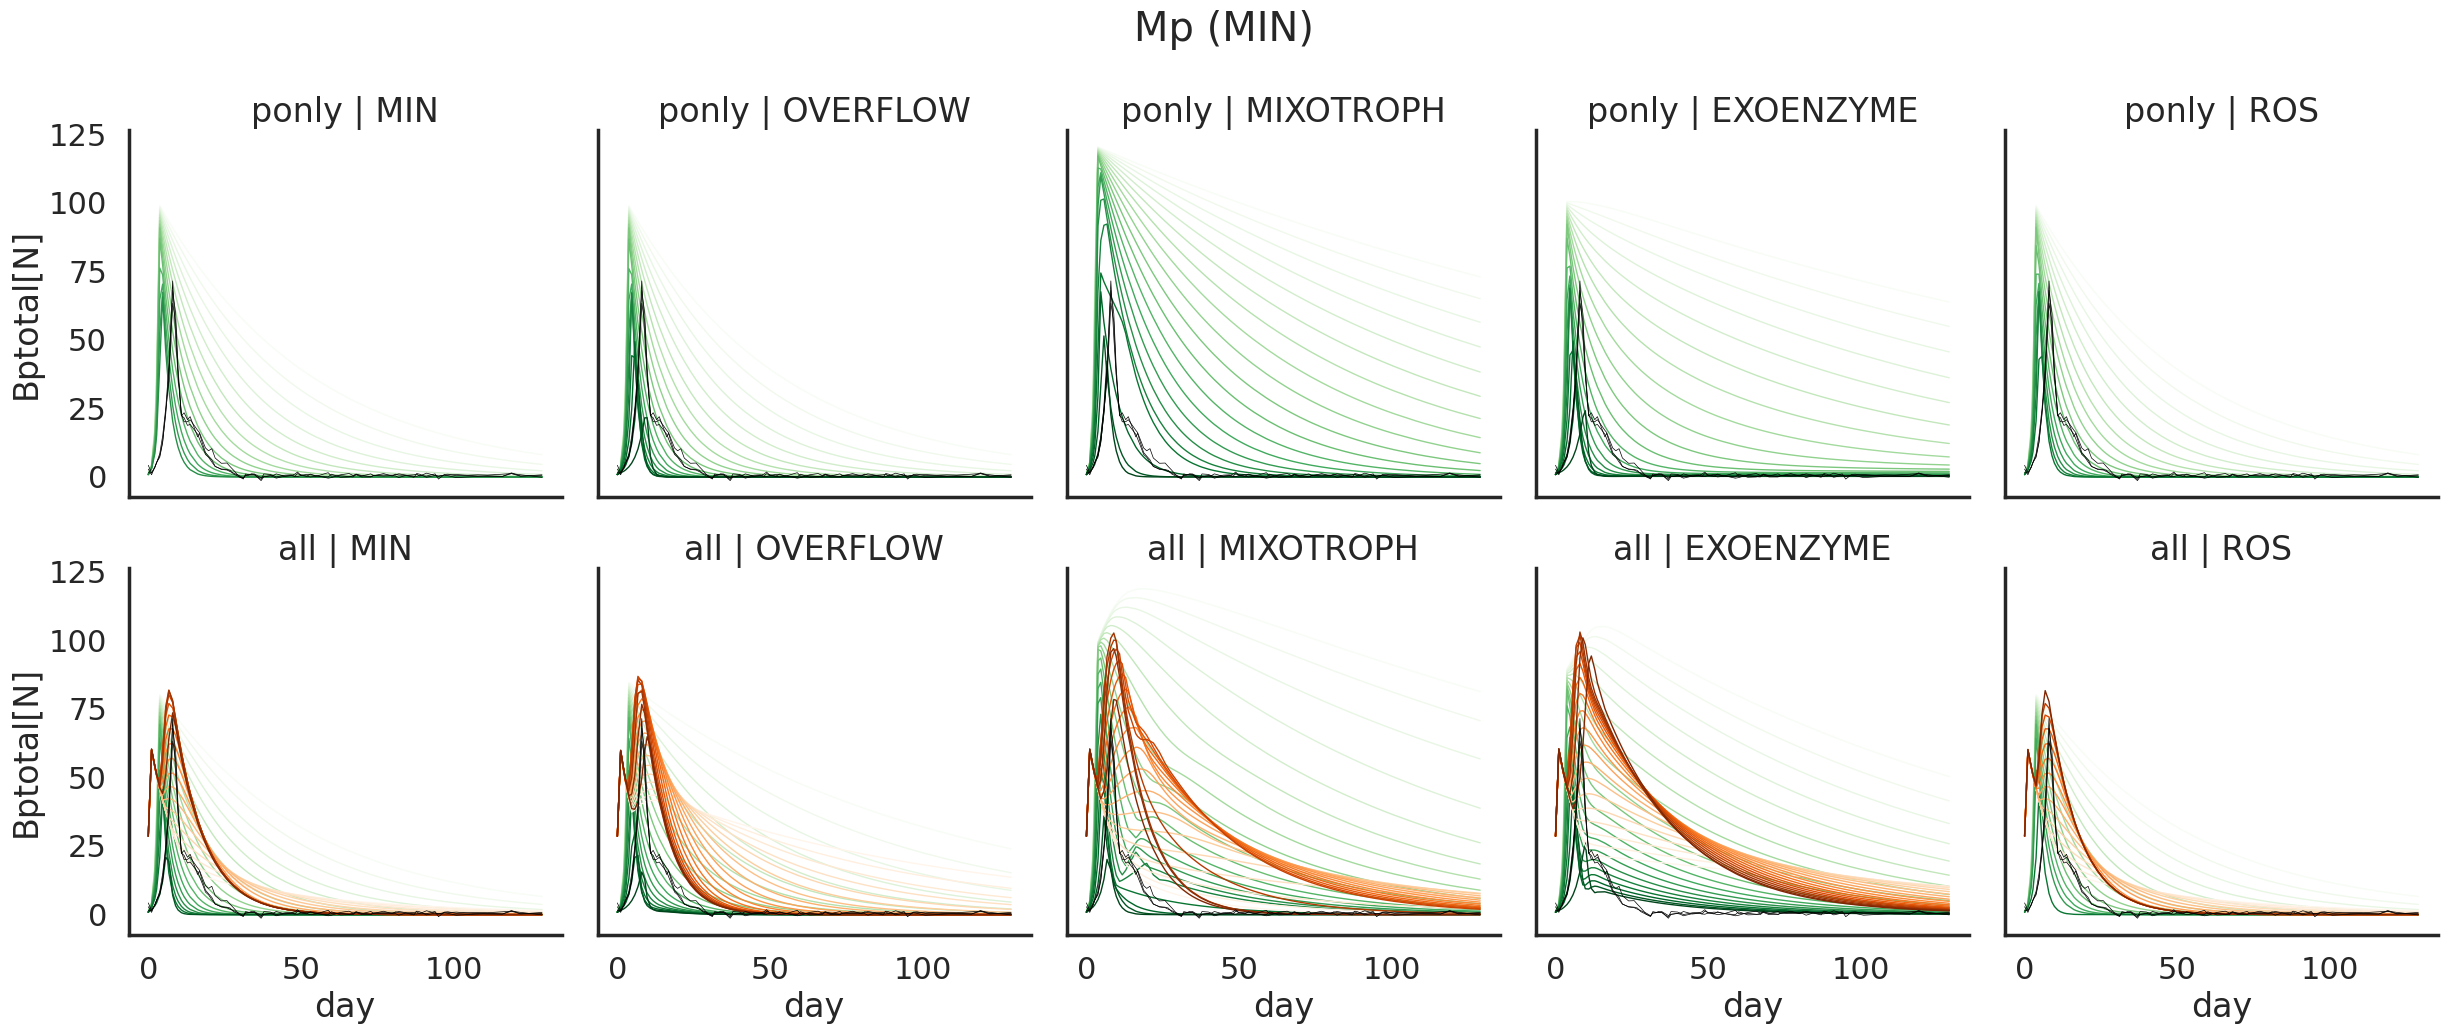

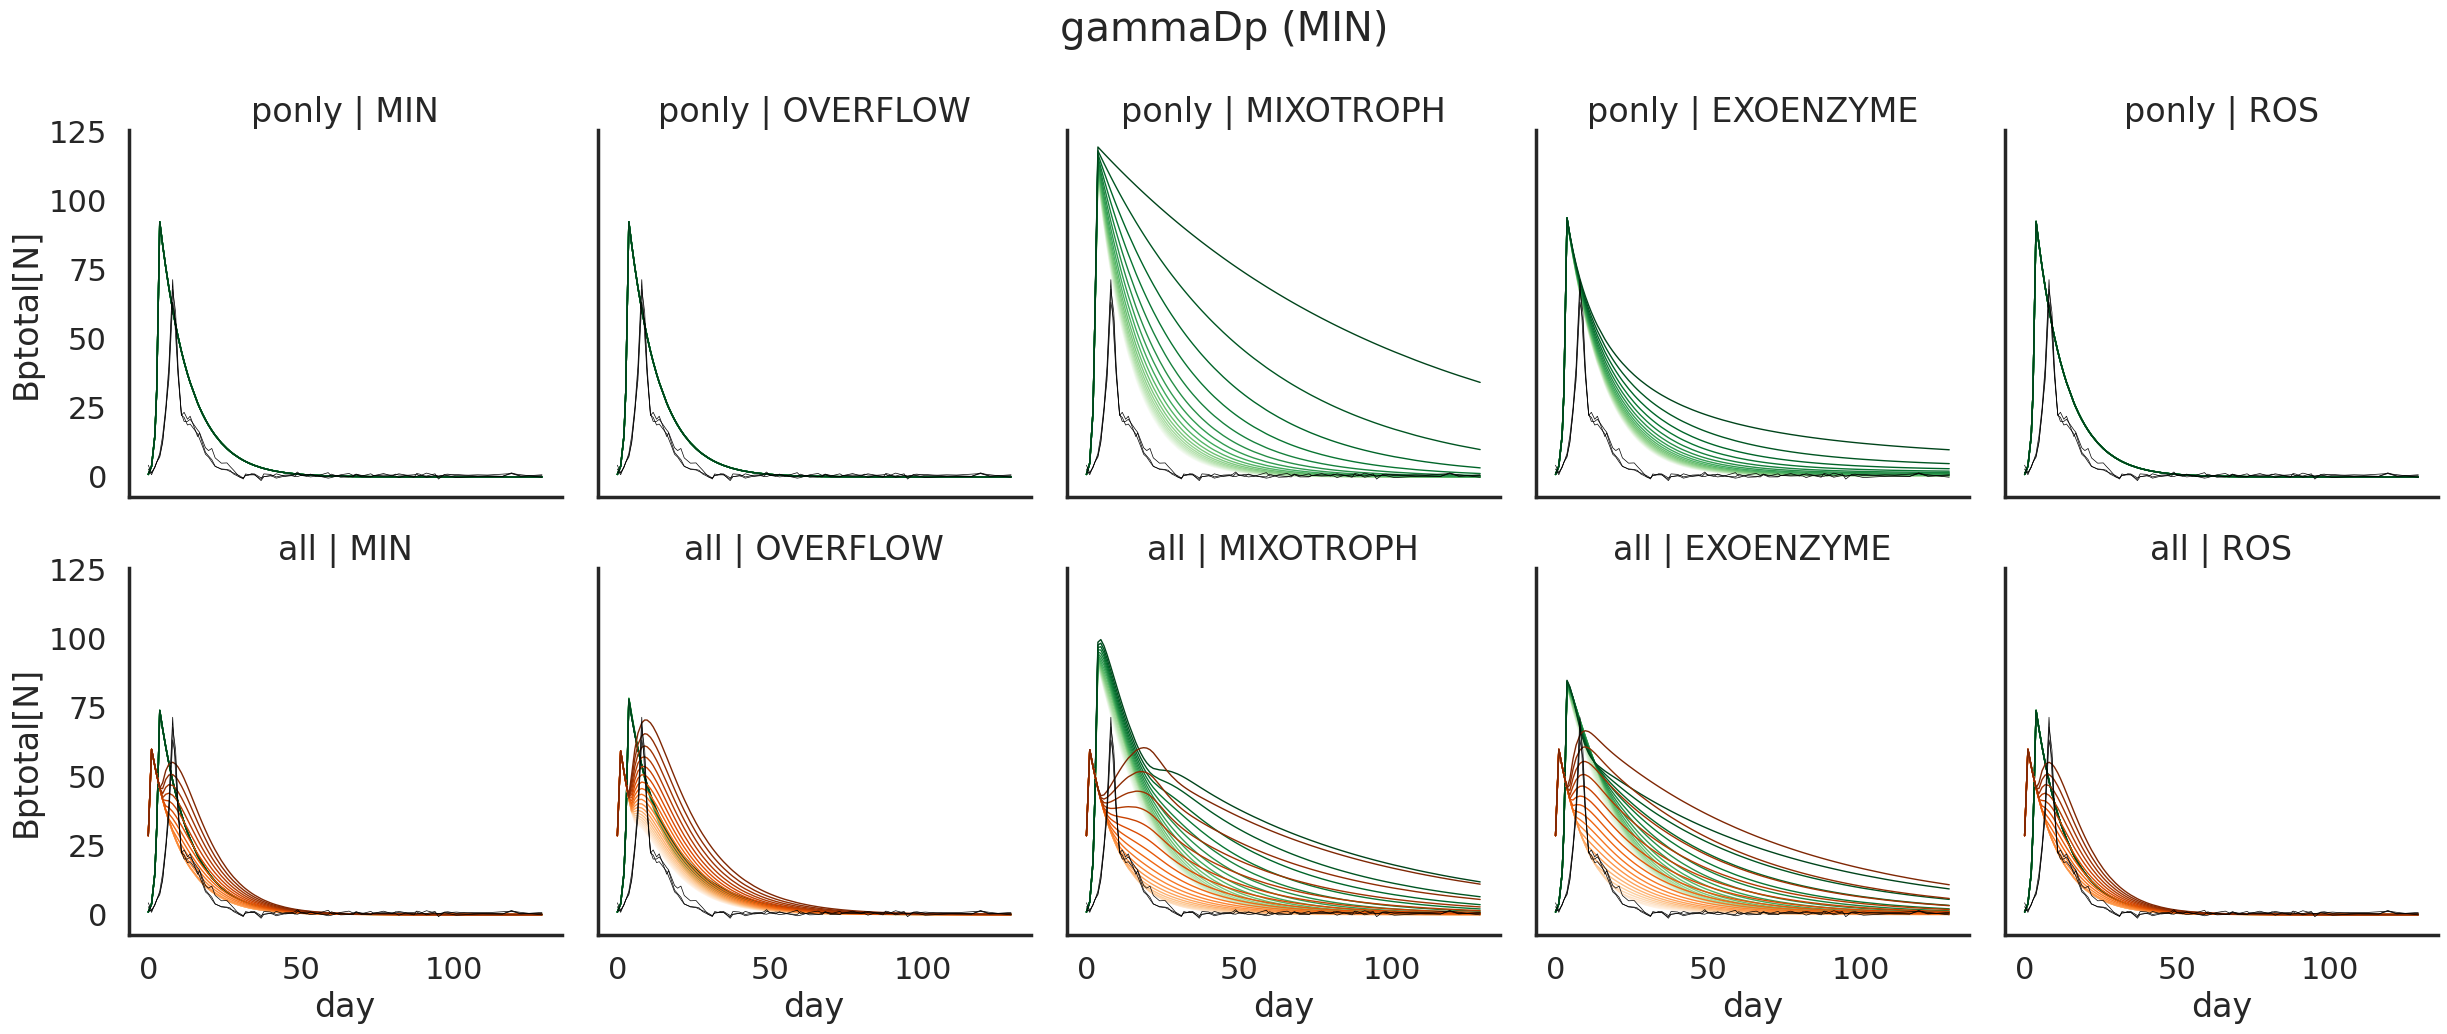

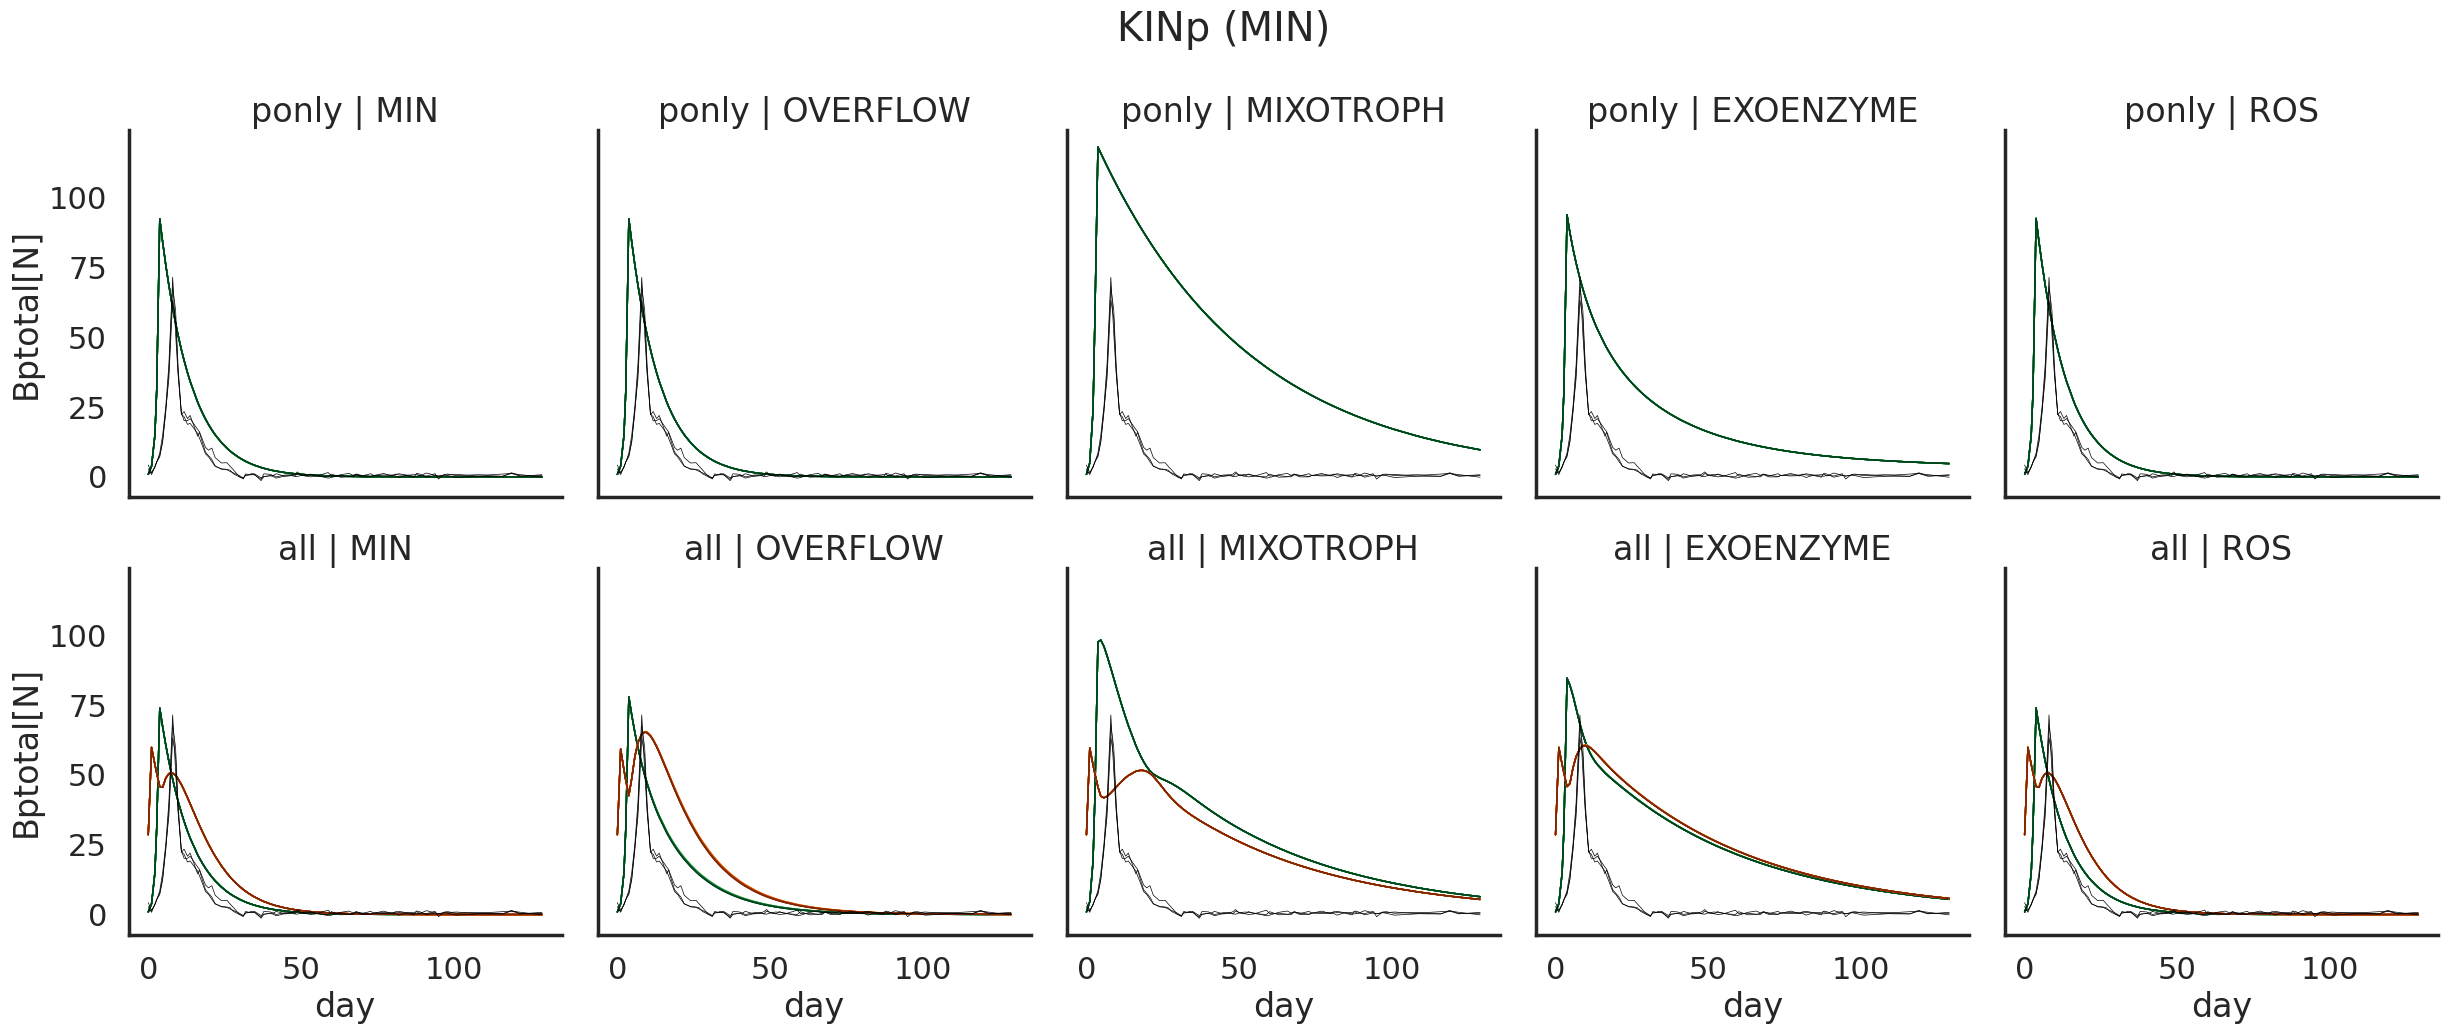

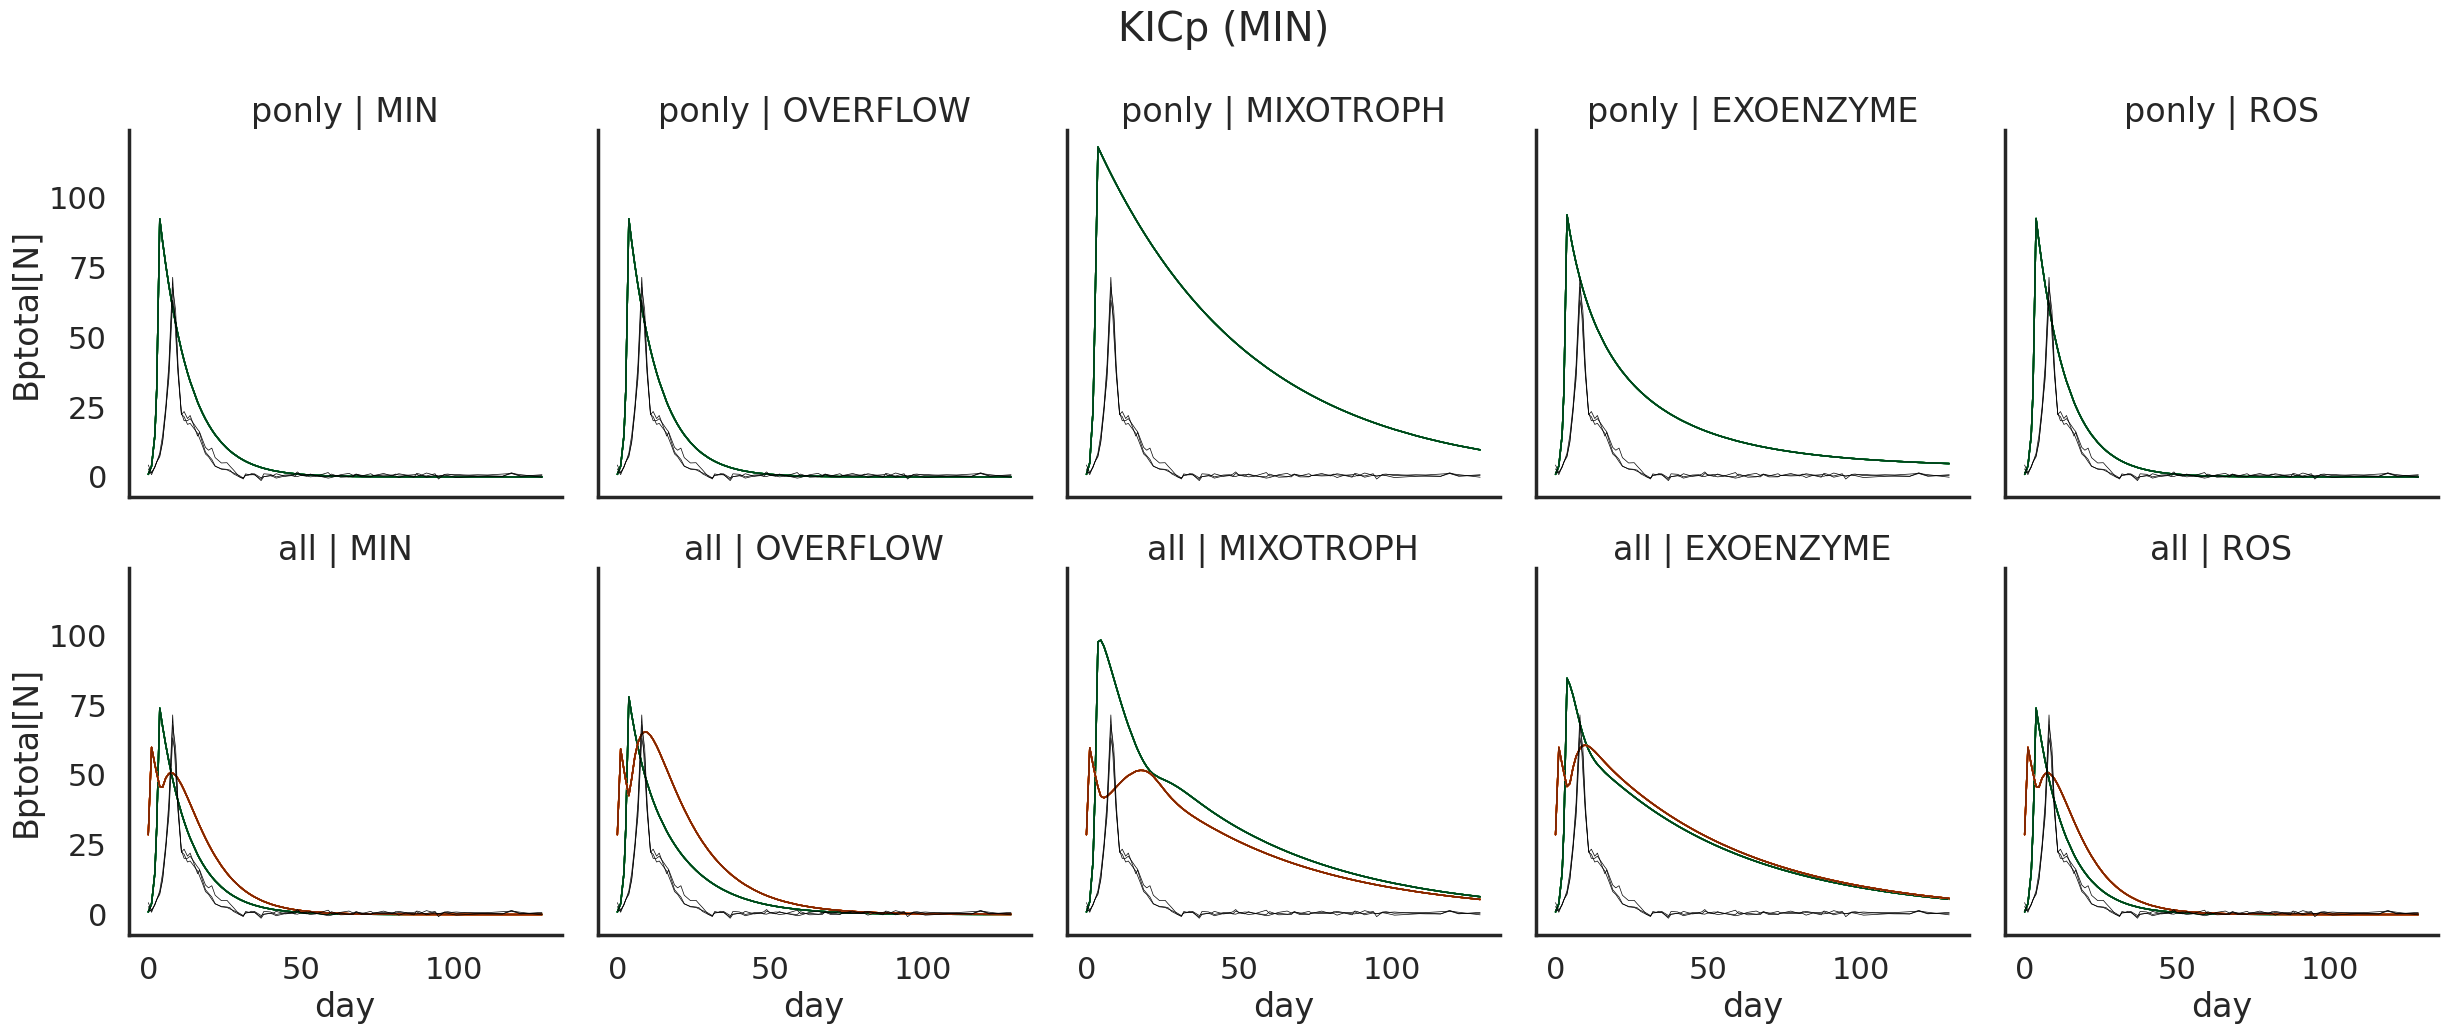

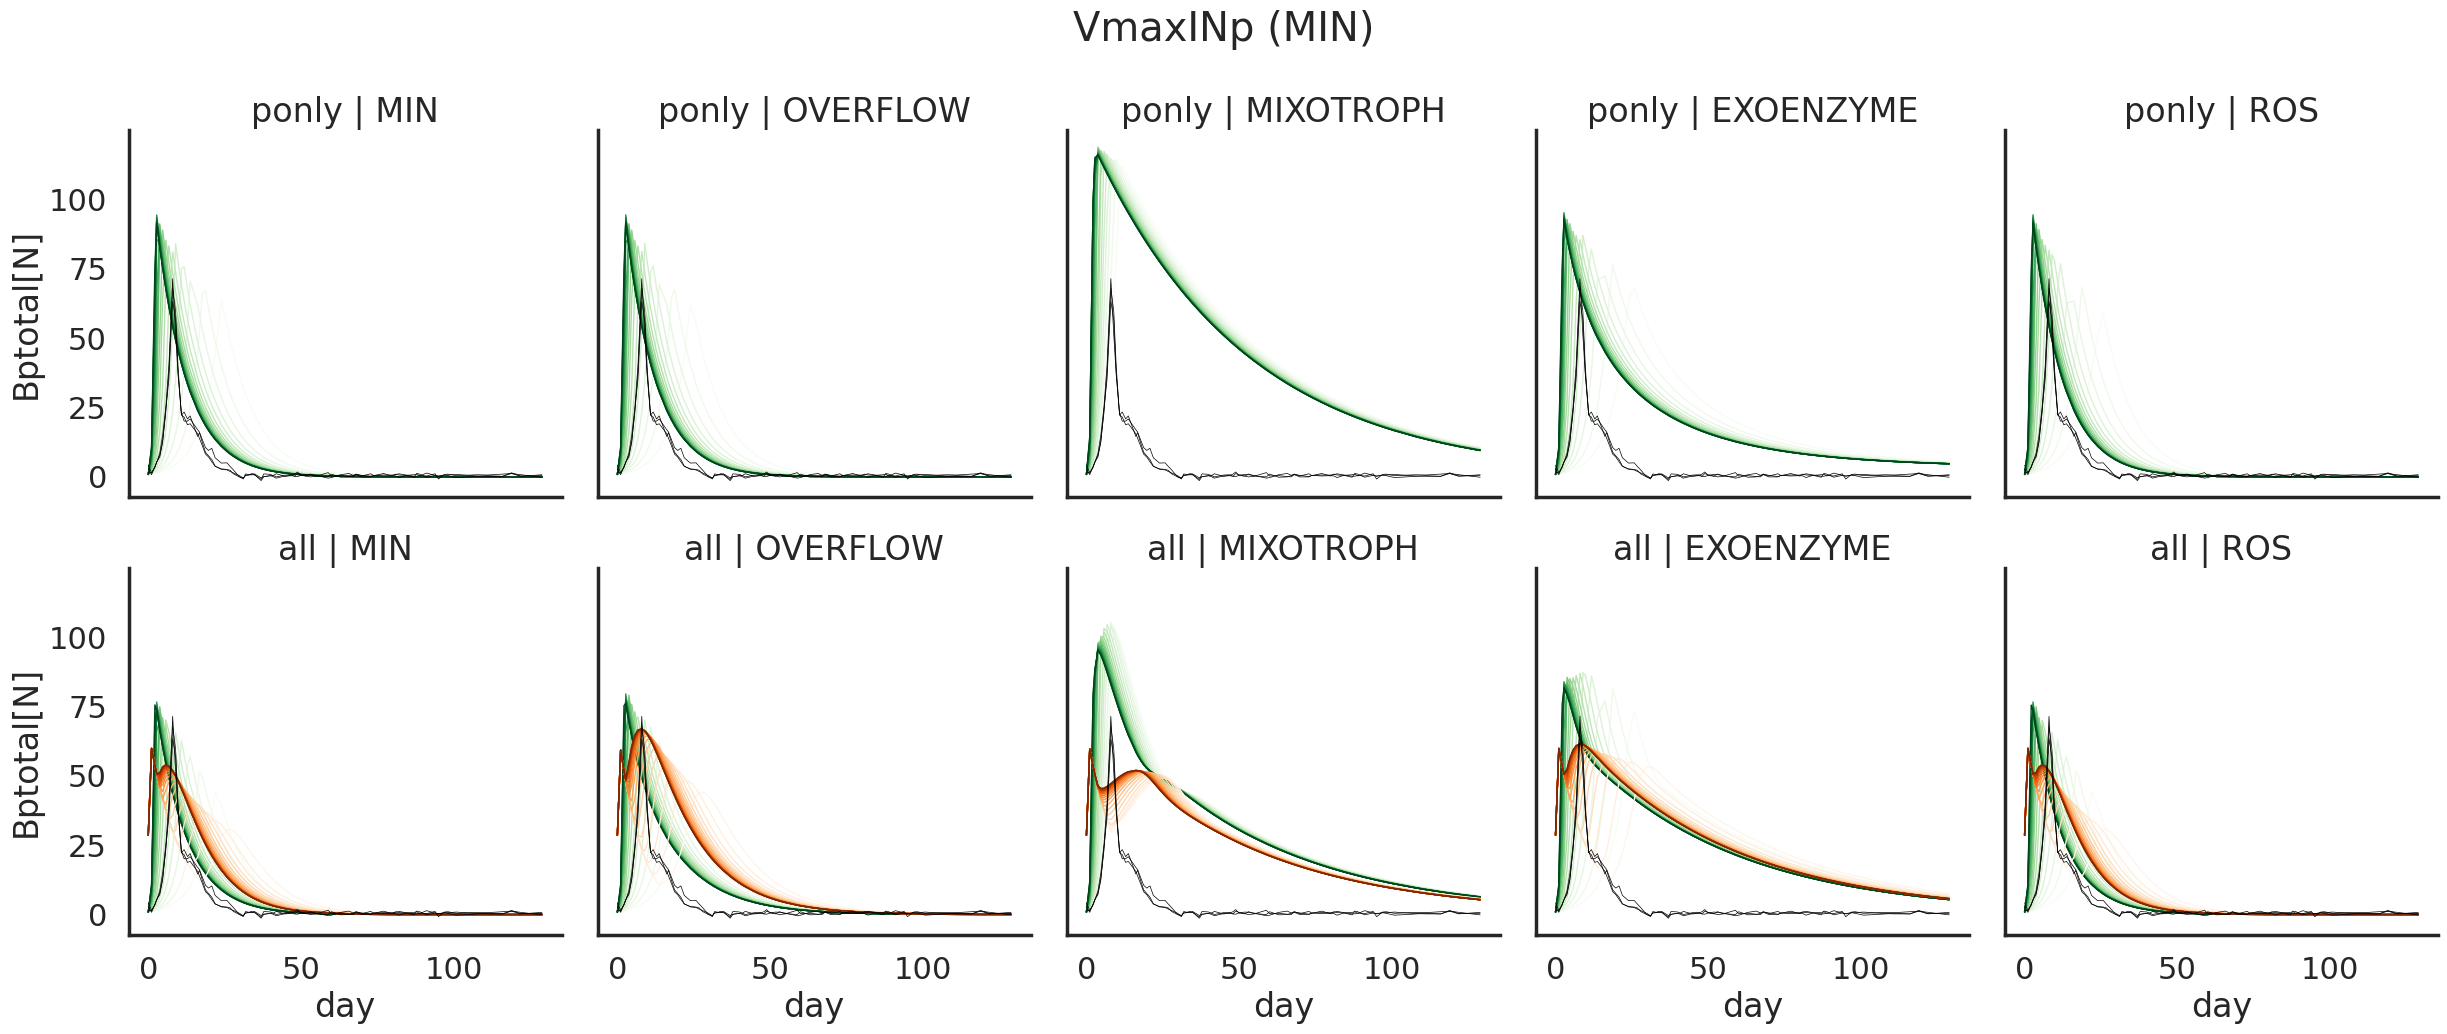

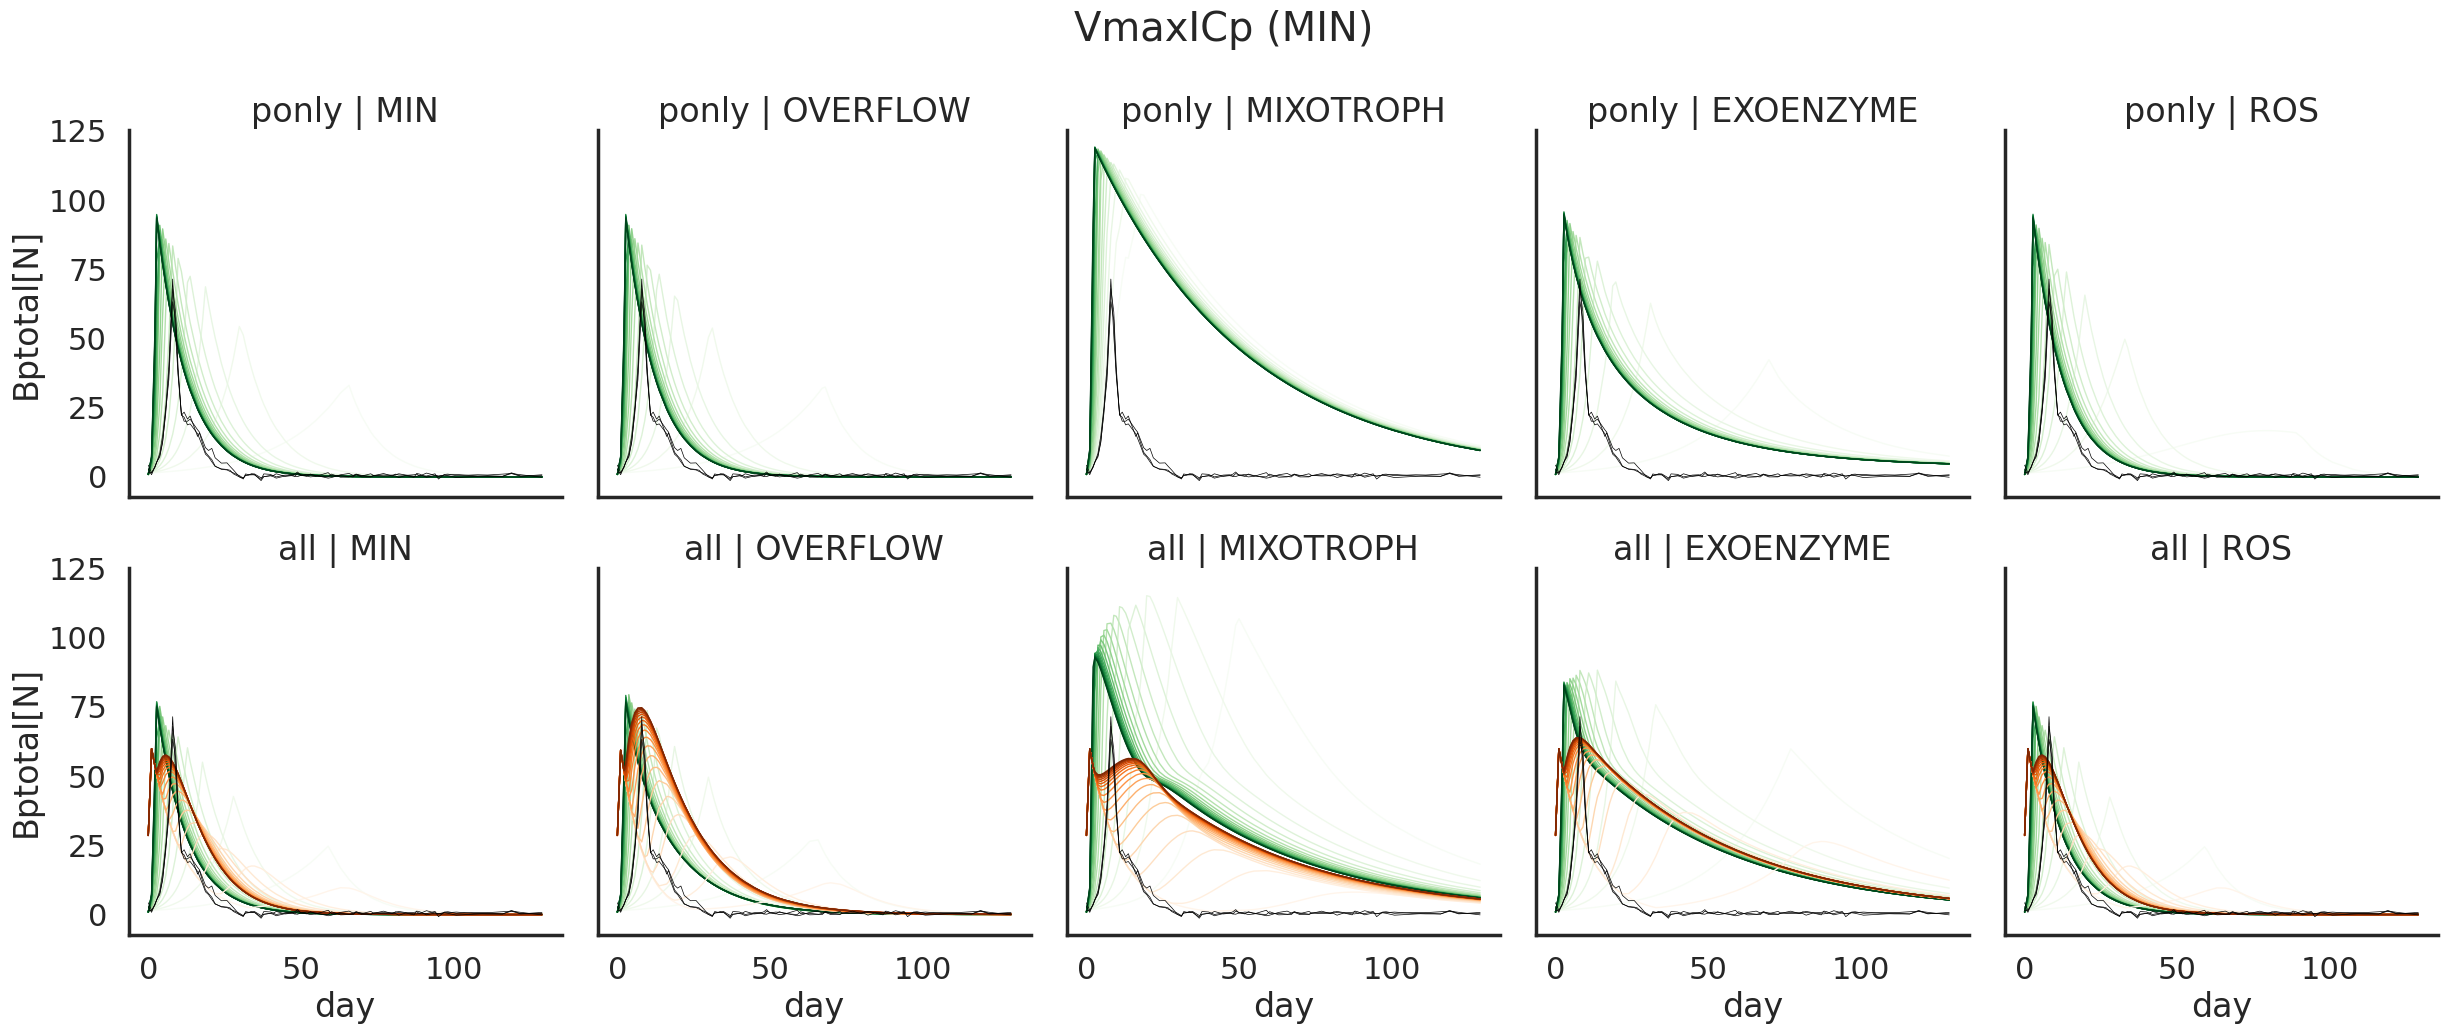

In [52]:

import matplotlib.colors as colors
organism_to_tune = 'PRO'
for model in ['MIN']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    curdf = sdf.loc[#sdf.model.isin([model]) & 
                    sdf.param.isin(pro_params_to_update) 
                    
                   ]
    for p in pro_params_to_update:
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            row='mode', lw=1, legend=False, palette='Greens',
            row_order=['ponly', 'all'],
            col='model', col_order=morder,
            hue='paramval', 
        )
        for (row_val, col_val), ax in g.axes_dict.items():
            if row_val == 'all':
                sns.lineplot(
                    data=curdf.loc[curdf.param.isin([p]) & curdf['mode'].isin(['all']) &
                                   curdf.model.isin([col_val])
                                  ], 
                    x='day', y='Bhtotal[N]',
                    units='run_id', estimator=None,
                     hue_norm=colors.LogNorm(),
                     lw=1, legend=False, palette='Oranges',
                    hue='paramval', ax=ax,
                )
            datadf = refdf 
            sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='black',

                         legend=False
                        )
        g.set_titles(col_template='{col_name}', row_template='{row_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


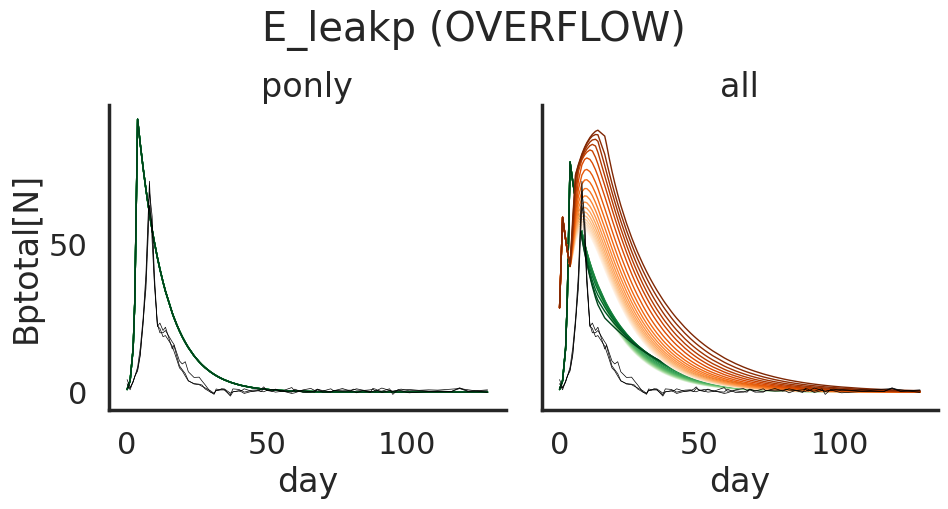

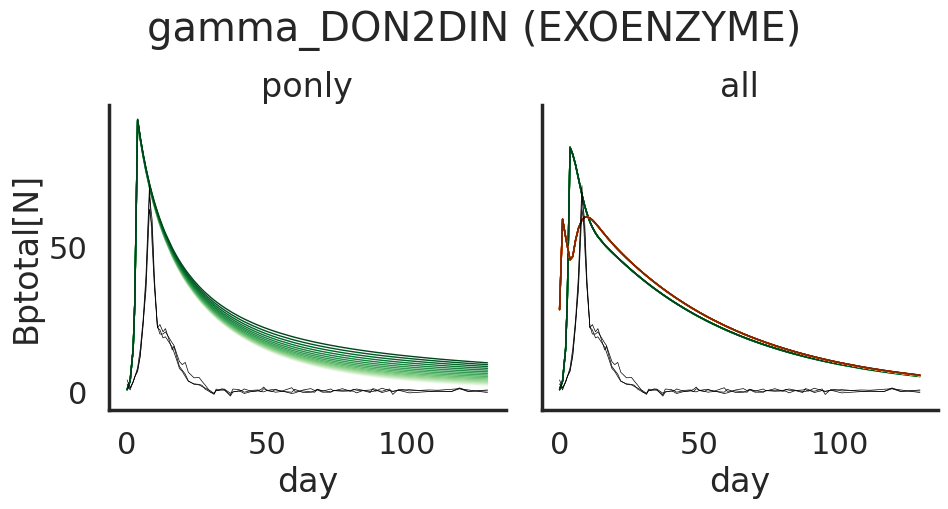

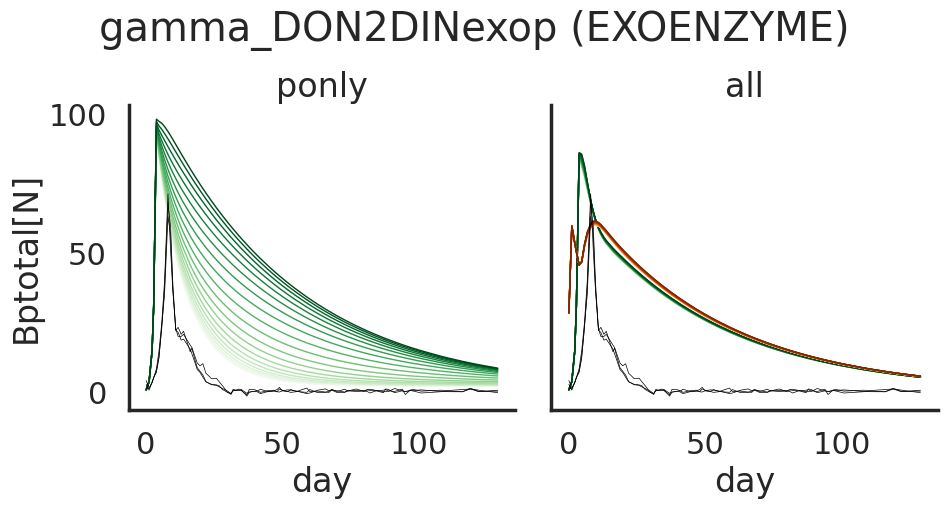

In [56]:

import matplotlib.colors as colors
organism_to_tune = 'PRO'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) 
                    
                   ]
    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='mode', lw=1, legend=False, palette='Greens',
            col_order=['ponly', 'all'],
            hue='paramval', 
        )
        for col_val, ax in g.axes_dict.items():
            if col_val == 'all':
                sns.lineplot(
                    data=curdf.loc[curdf.param.isin([p]) & curdf['mode'].isin(['all'])], 
                    x='day', y='Bhtotal[N]',
                    units='run_id', estimator=None,
                     hue_norm=colors.LogNorm(),
                     lw=1, legend=False, palette='Oranges',
                    hue='paramval', 
                )
            datadf = refdf 
            sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='black',

                         legend=False
                        )
        g.set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


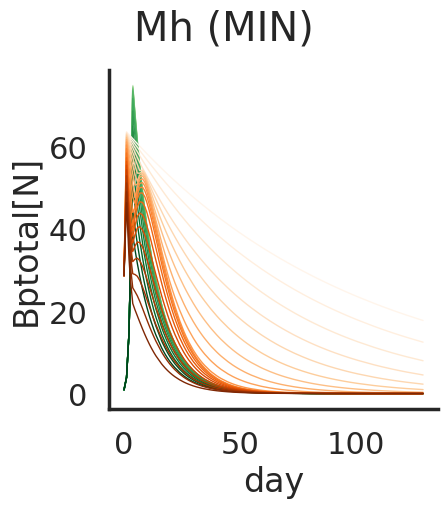

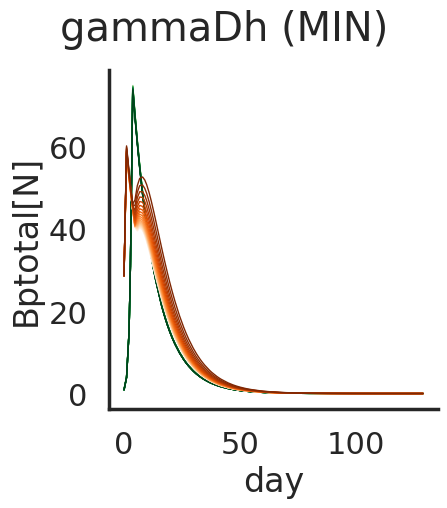

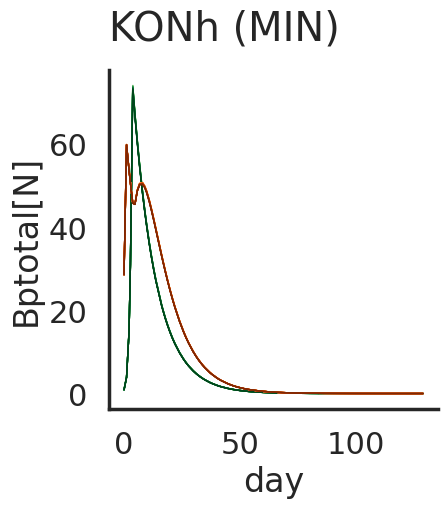

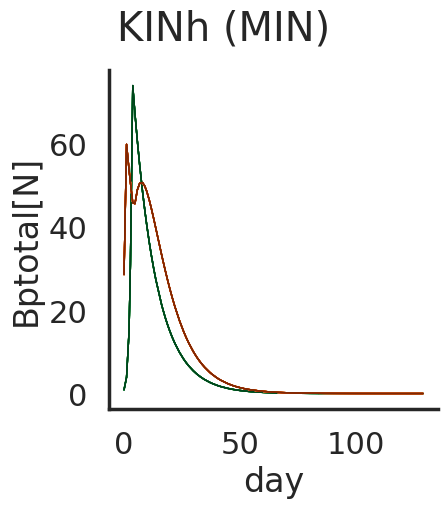

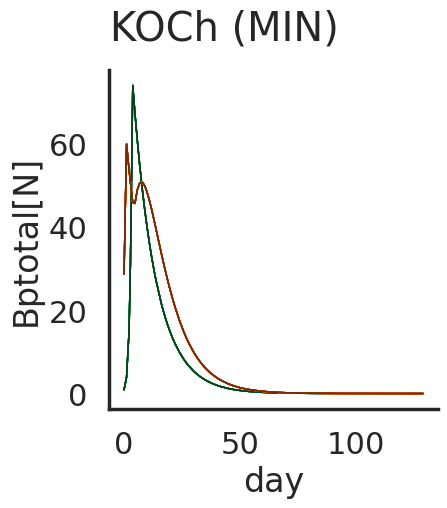

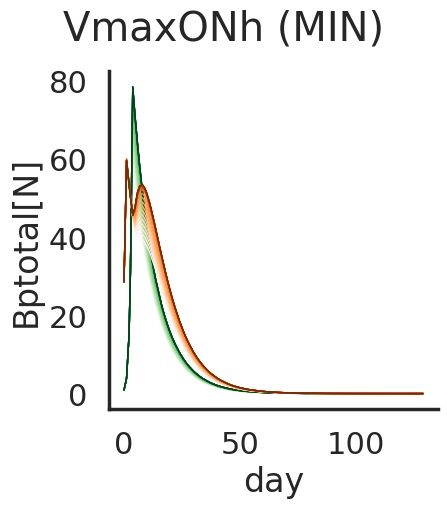

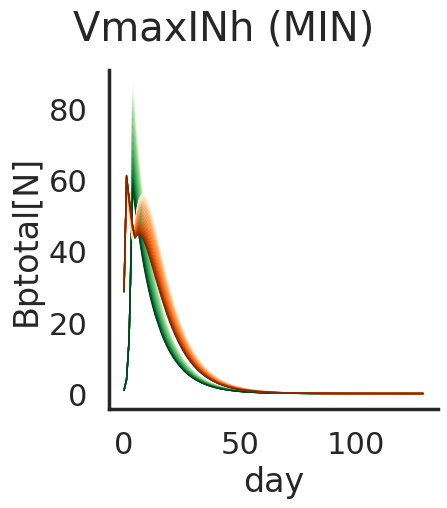

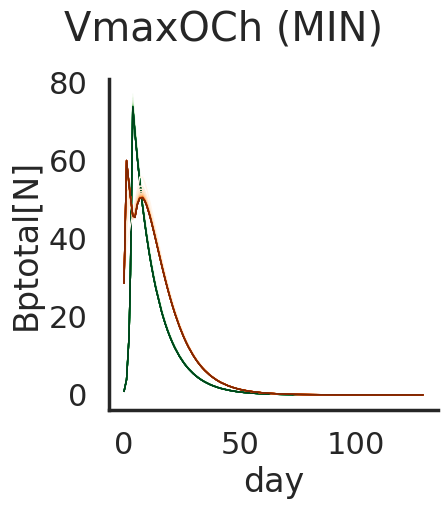

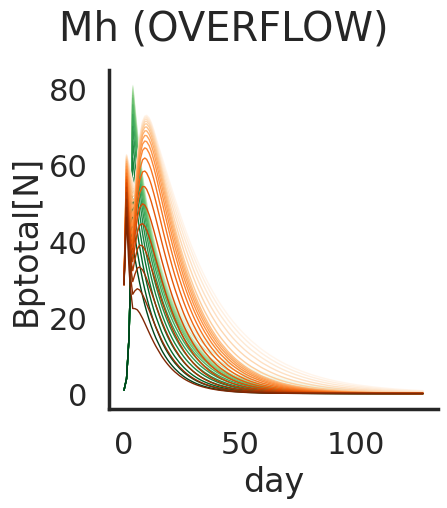

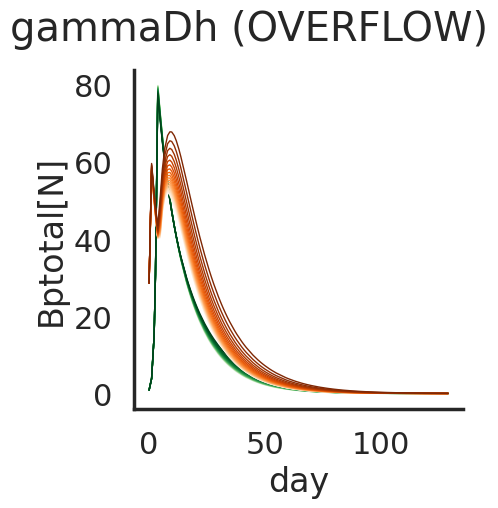

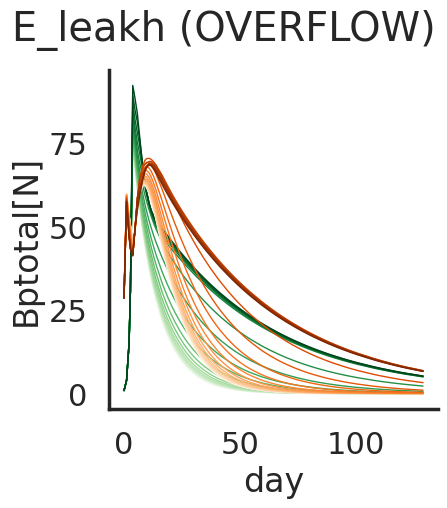

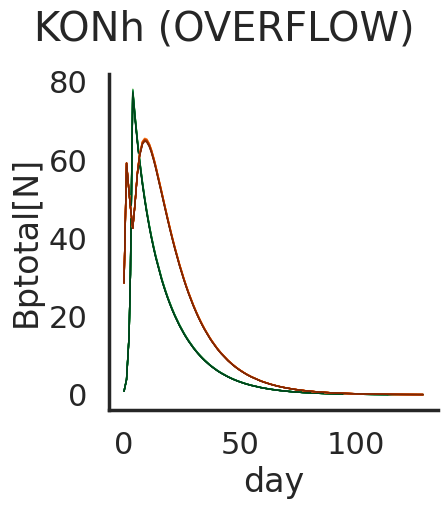

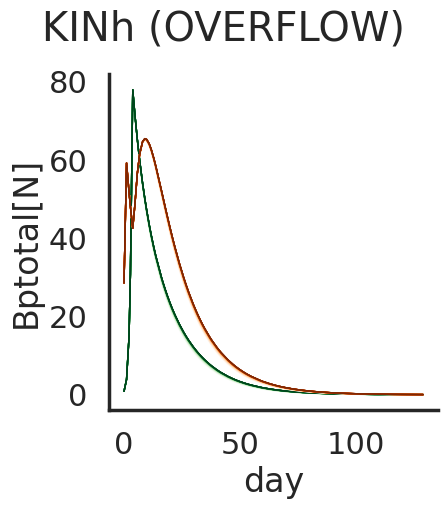

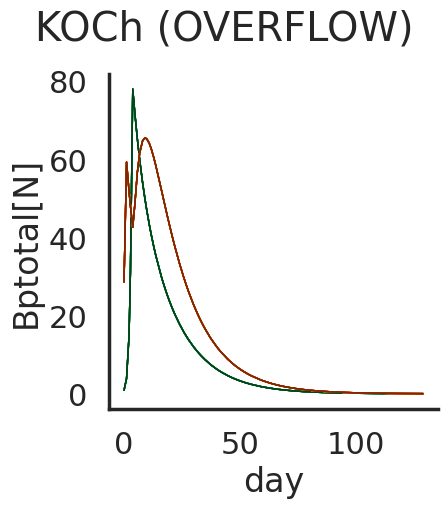

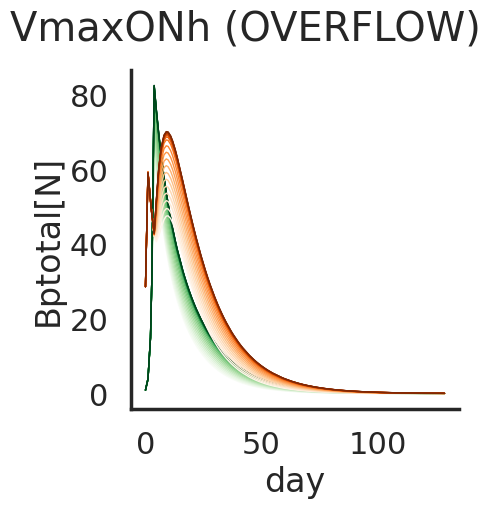

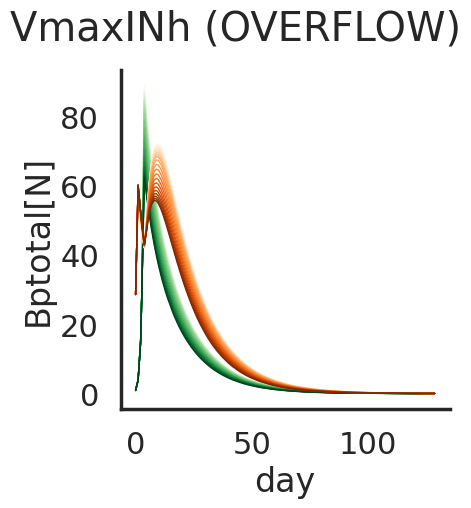

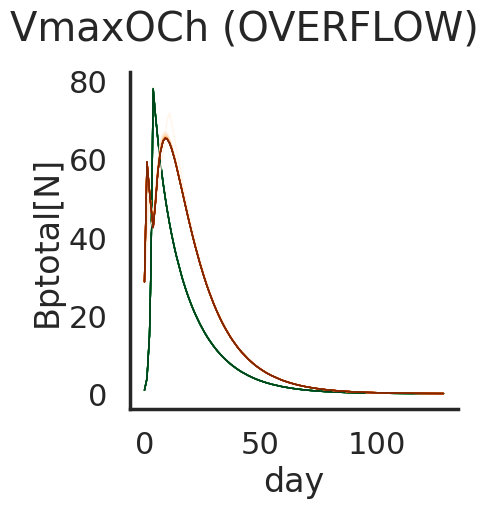

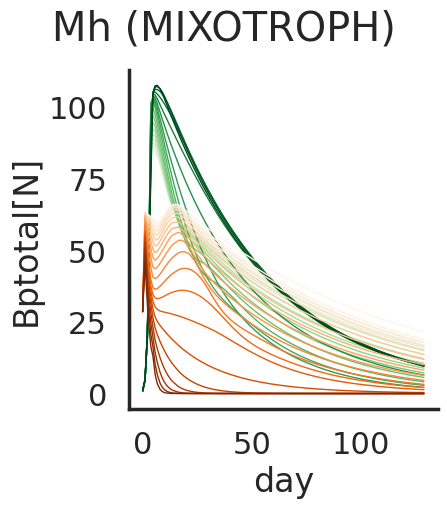

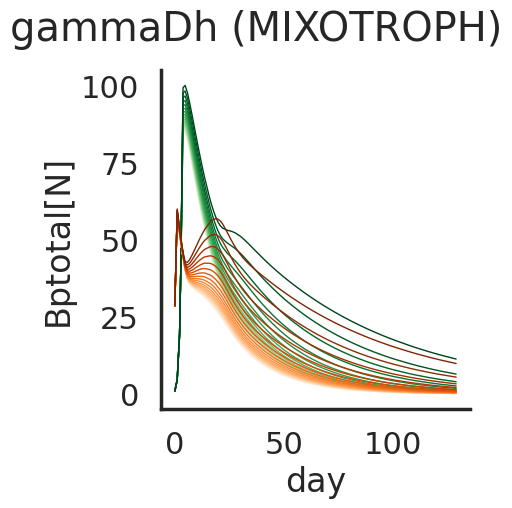

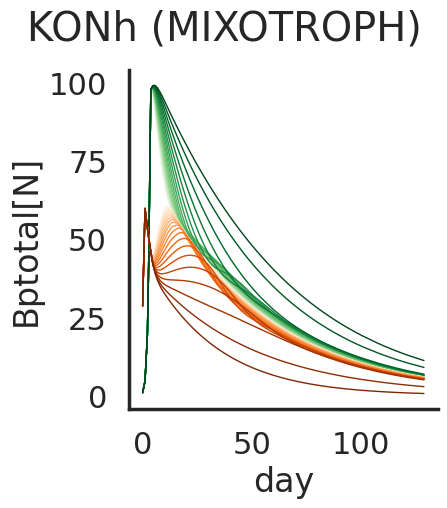

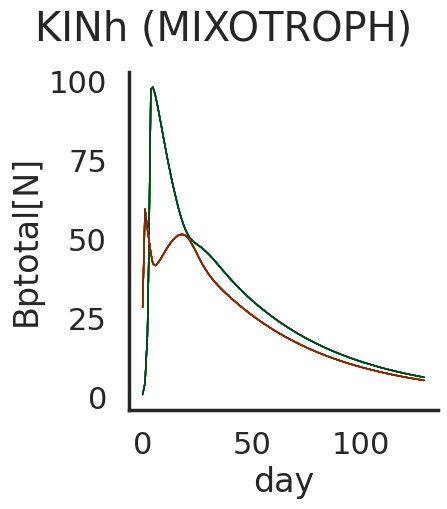

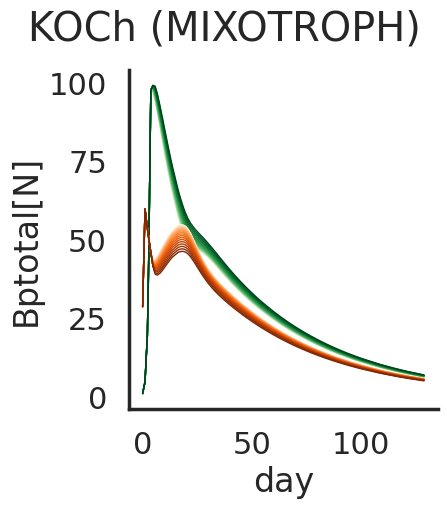

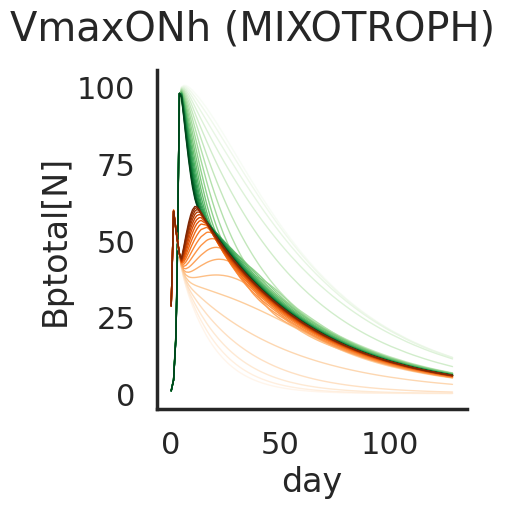

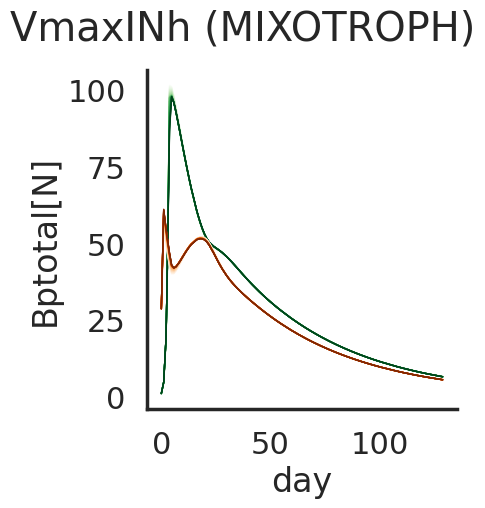

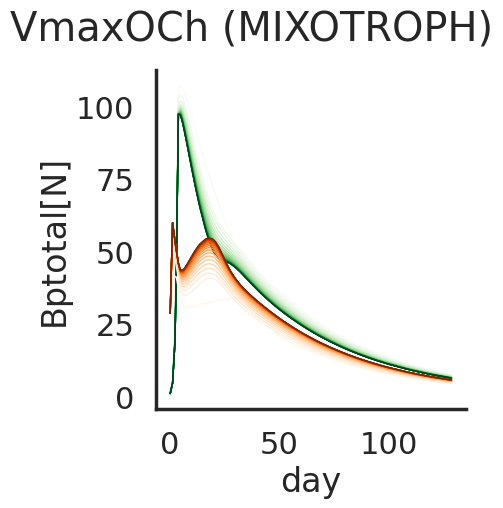

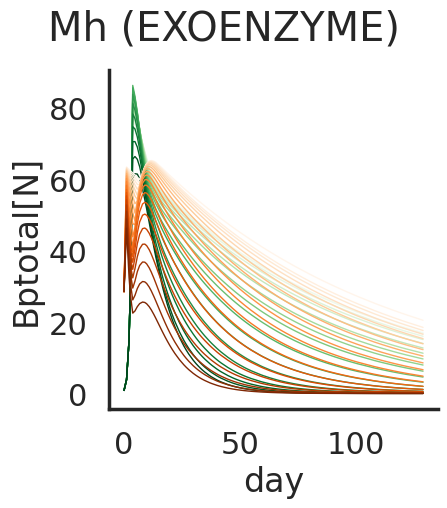

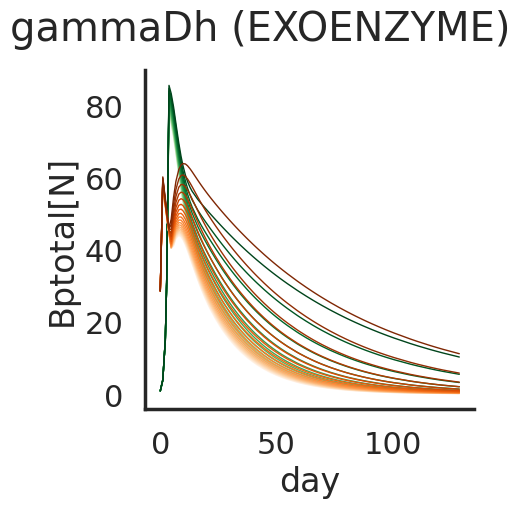

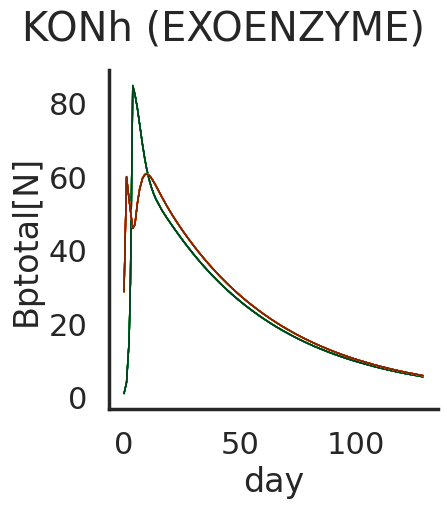

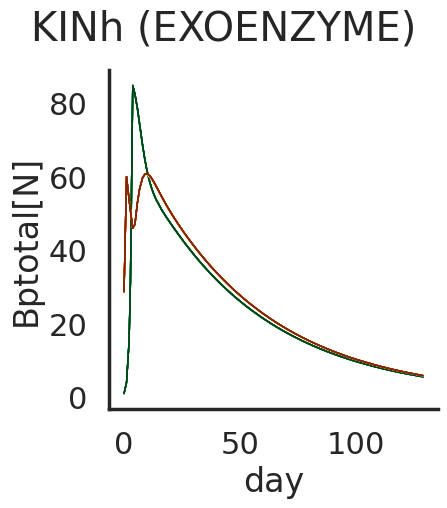

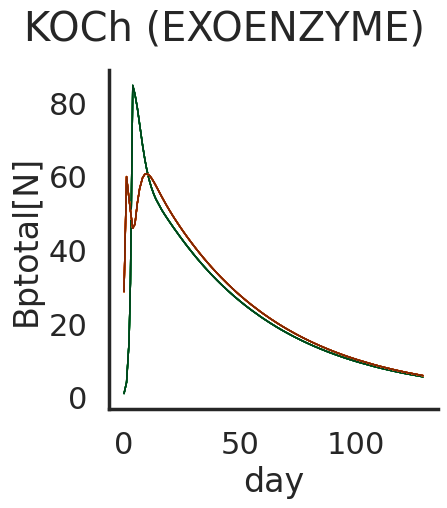

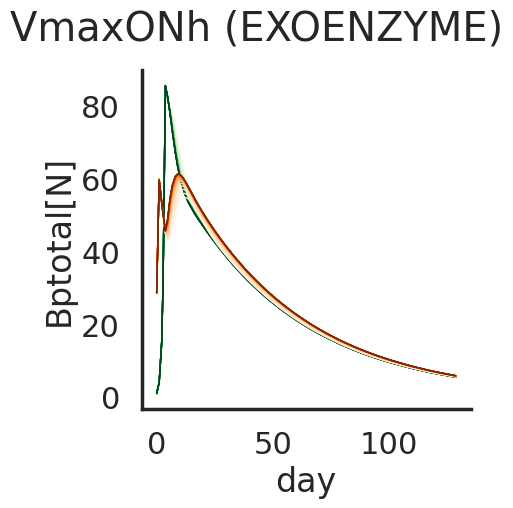

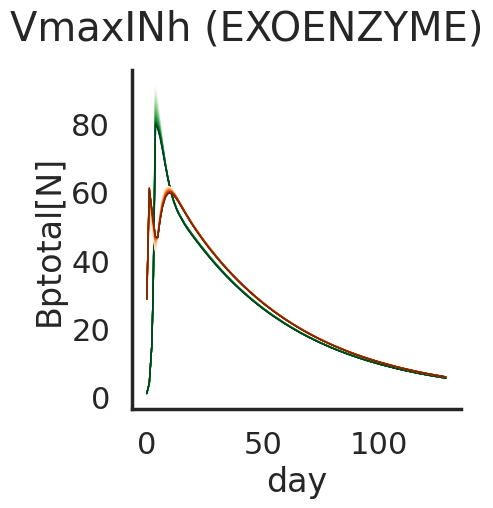

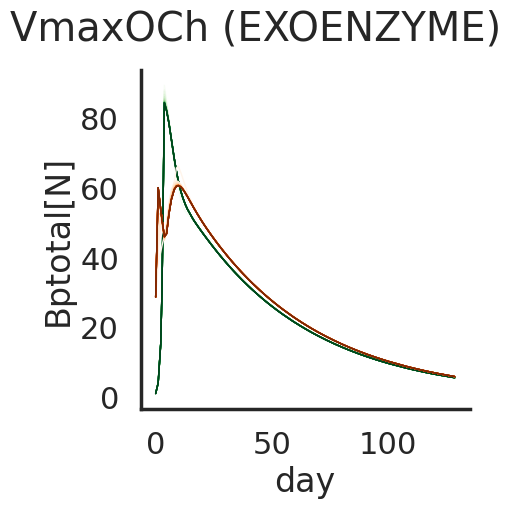

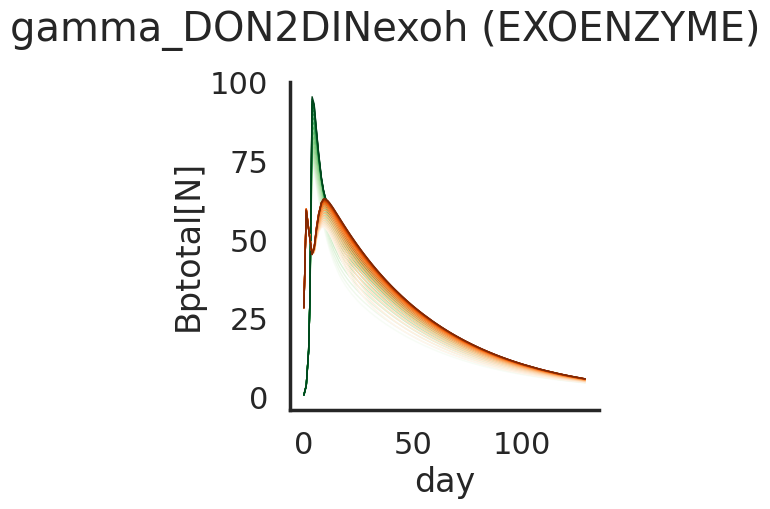

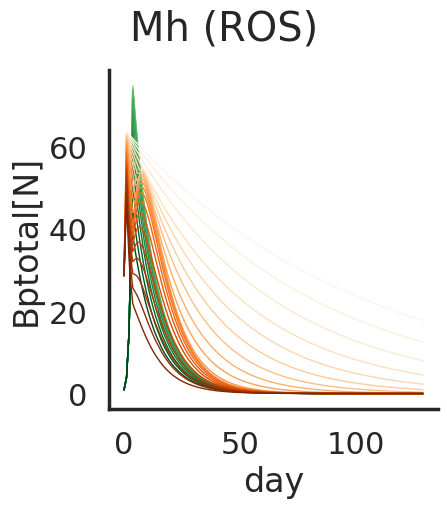

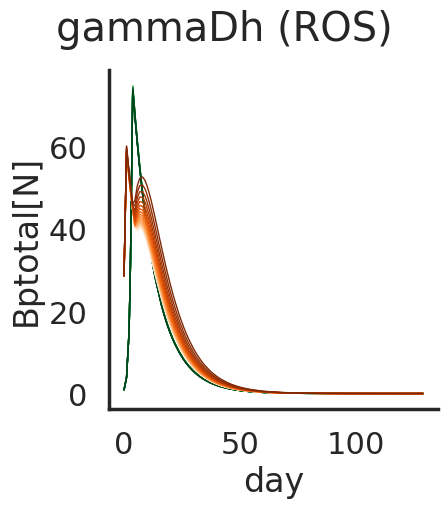

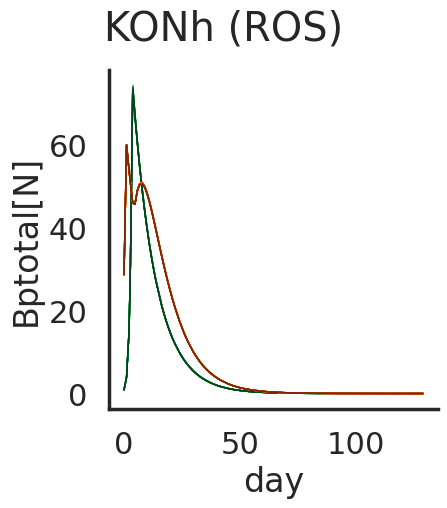

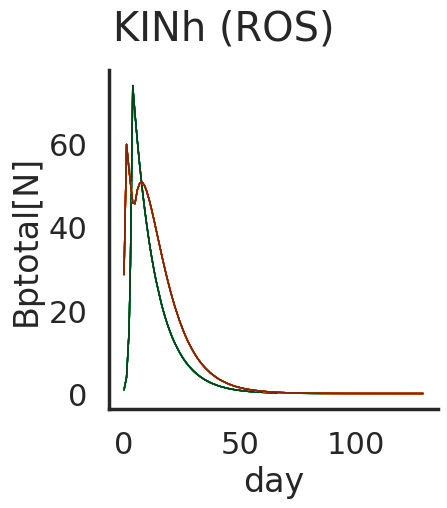

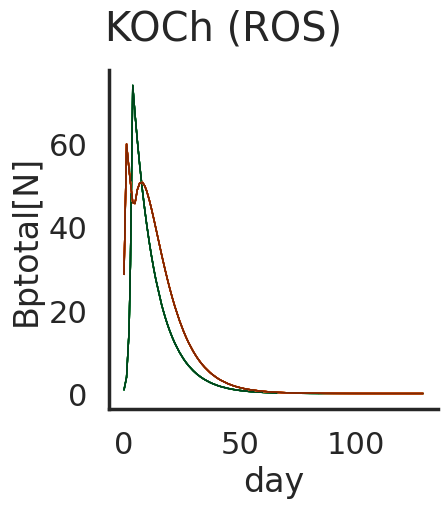

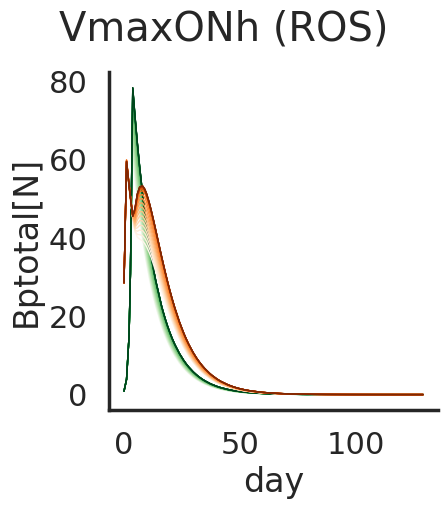

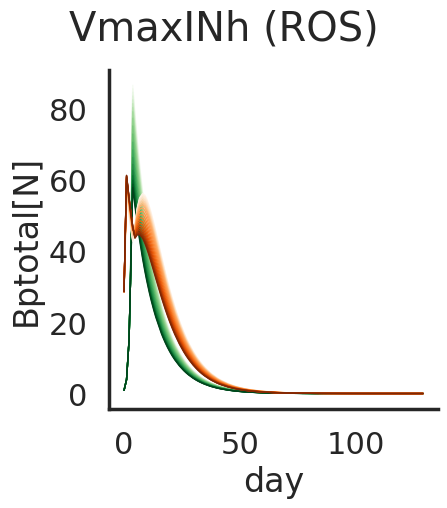

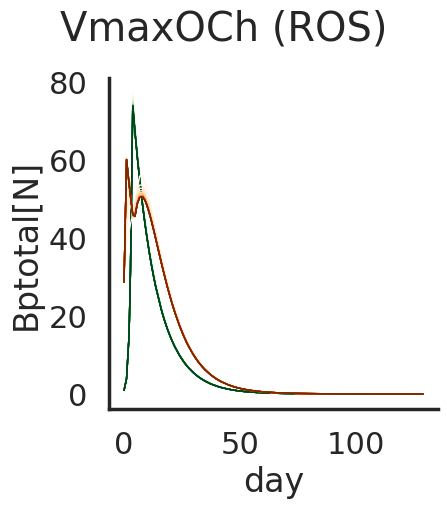

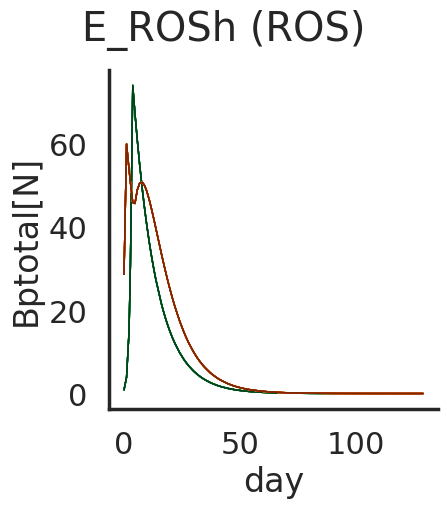

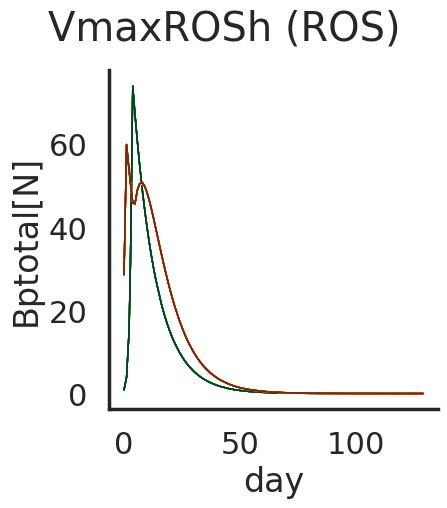

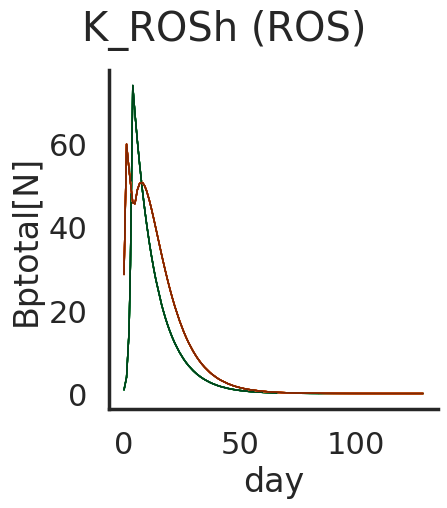

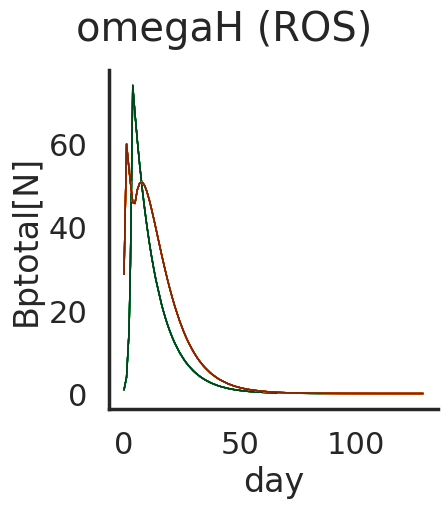

In [47]:

import matplotlib.colors as colors
organism_to_tune = 'HET'
for model in morder: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    for p in pro_params_to_update:
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            lw=1, legend=False, palette='Greens',
            hue='paramval', 
        )
        sns.lineplot(
            data=curdf.loc[curdf.param.isin([p])], 
            x='day', y='Bhtotal[N]',
            units='run_id', estimator=None,
             hue_norm=colors.LogNorm(),
             lw=1, legend=False, palette='Oranges',
            hue='paramval', 
        )
        datadf = refdf 
        sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
        units='Sample', estimator=None, lw=0.5, color='black',

                     legend=False
                    )
        g.set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


In [48]:
sdf.describe()

Bp            Np            Cp            DON           RDON  \
count  2.504900e+05  2.504900e+05  2.504900e+05  250490.000000  250490.000000   
mean   2.104409e+01  8.636063e-01  6.488198e+01      54.535095      43.453888   
std    2.559638e+01  2.717055e+00  8.029462e+01      42.162694      34.778147   
min   -8.811010e-09 -9.810253e-09 -2.379814e-20       0.002250       0.000000   
25%    7.651637e-01  2.160692e-36  1.721166e+00       8.526537      19.767903   
50%    1.002056e+01  2.074988e-02  3.020803e+01      63.932391      35.231841   
75%    3.373715e+01  7.042731e-01  1.026760e+02      99.300998      58.313712   
max    1.188397e+02  5.374132e+01  5.233412e+02     121.203557     149.454149   

                DIN            DOC           RDOC            DIC  \
count  2.504900e+05  250490.000000  250490.000000  250490.000000   
mean   4.737488e+00     491.764794     331.752213    2129.443321   
std    1.933313e+01     633.323023     269.994286     202.735690   
min   -4.390986e-09       0.000594       0.000000     760.798148   
25%    1.705654e-37       0.015976     174.395849    2082.981696   
50%    2.398398e-22      90.813398     236.363266    2229.646261   
75%    1.655717e-03     879.504043     434.339377    2241.552301   
max    1.026217e+02    4447.111062    1323.243091    2376.443600   

                 ROS  ...            QCh  biosynthesisNh  respirationCh  \
count  250490.000000  ...  125282.000000    1.252820e+05   1.252820e+05   
mean        3.978634  ...       4.187981    1.481183e-05   1.787078e-04   
std        13.681686  ...       1.296760    2.274316e-05   1.703533e-04   
min         0.002245  ...    -300.750043   -1.477439e-27  -8.211443e-28   
25%         0.200000  ...       4.000450    2.093608e-08   1.204295e-05   
50%         0.200000  ...       4.039989    5.091514e-06   1.232862e-04   
75%         0.200000  ...       4.113657    2.156465e-05   3.297321e-04   
max       368.820539  ...      86.036163    3.134992e-04   9.404193e-04   

       biomass_breakdownCh    overflowNh    overflowCh         Bh[C]  \
count        125282.000000  1.252820e+05  1.252820e+05  1.252820e+05   
mean              0.000003  8.781807e-07  7.447656e-10  8.542437e+01   
std               0.000023  3.294710e-06  1.081461e-07  8.138601e+01   
min               0.000000  0.000000e+00  0.000000e+00 -3.942255e-22   
25%               0.000000  0.000000e+00  0.000000e+00  5.768291e+00   
50%               0.000000  0.000000e+00  0.000000e+00  5.905137e+01   
75%               0.000000  0.000000e+00  0.000000e+00  1.577381e+02   
max               0.000444  1.253275e-04  2.120044e-05  4.489562e+02   

         Bhtotal[N]    Bhtotal[C]      paramval  
count  1.252820e+05  1.252820e+05  2.504900e+05  
mean   2.109102e+01  8.966762e+01  1.410532e-01  
std    2.007787e+01  8.696610e+01  2.576071e-01  
min   -5.369957e-23 -4.731124e-22  2.314815e-09  
25%    1.572191e+00  5.922608e+00  1.107140e-05  
50%    1.473005e+01  6.150752e+01  5.058231e-04  
75%    3.877265e+01  1.633204e+02  1.596571e-01  
max    1.029972e+02  4.779215e+02  2.502723e+00  

[8 rows x 48 columns]

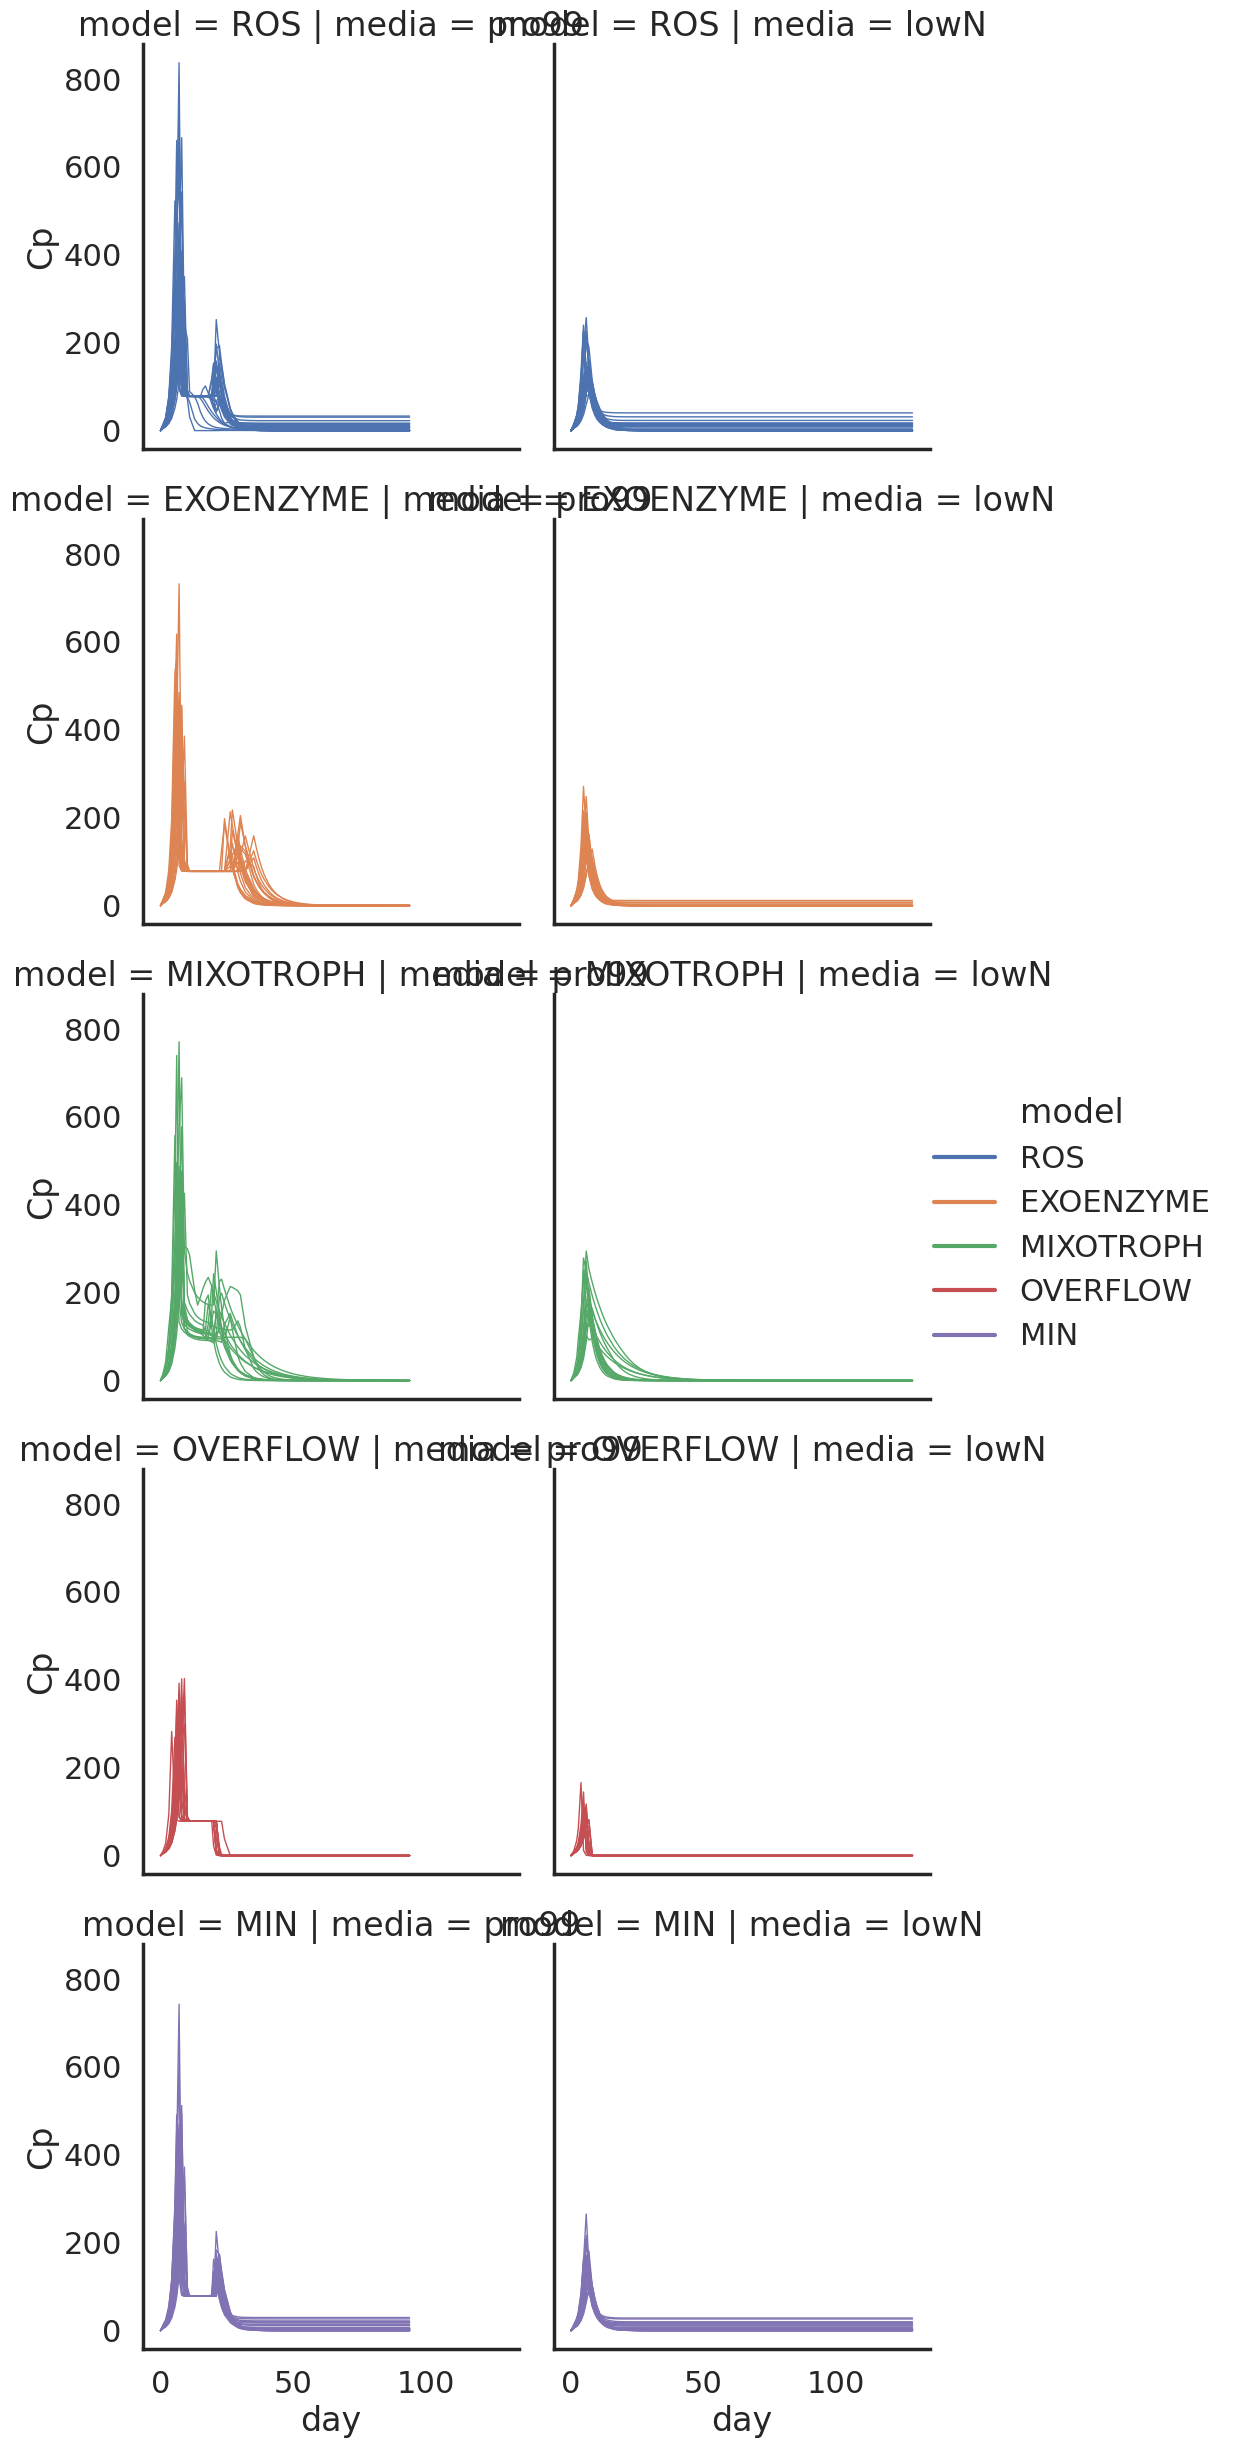

In [41]:

g = sns.relplot(
    data=vprodf.loc[vprodf.vpro.isin(lowerror_ids)], 
    x='day', y='Cp',
    units='run_id', estimator=None,
     kind='line',
    hue='model', col='media', lw=1, row='model',
)# .set(ylim=(0,100))


In [44]:
vprodf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'media', 'mode', 'run',
       'model', 'vpro'],
      dtype='object')

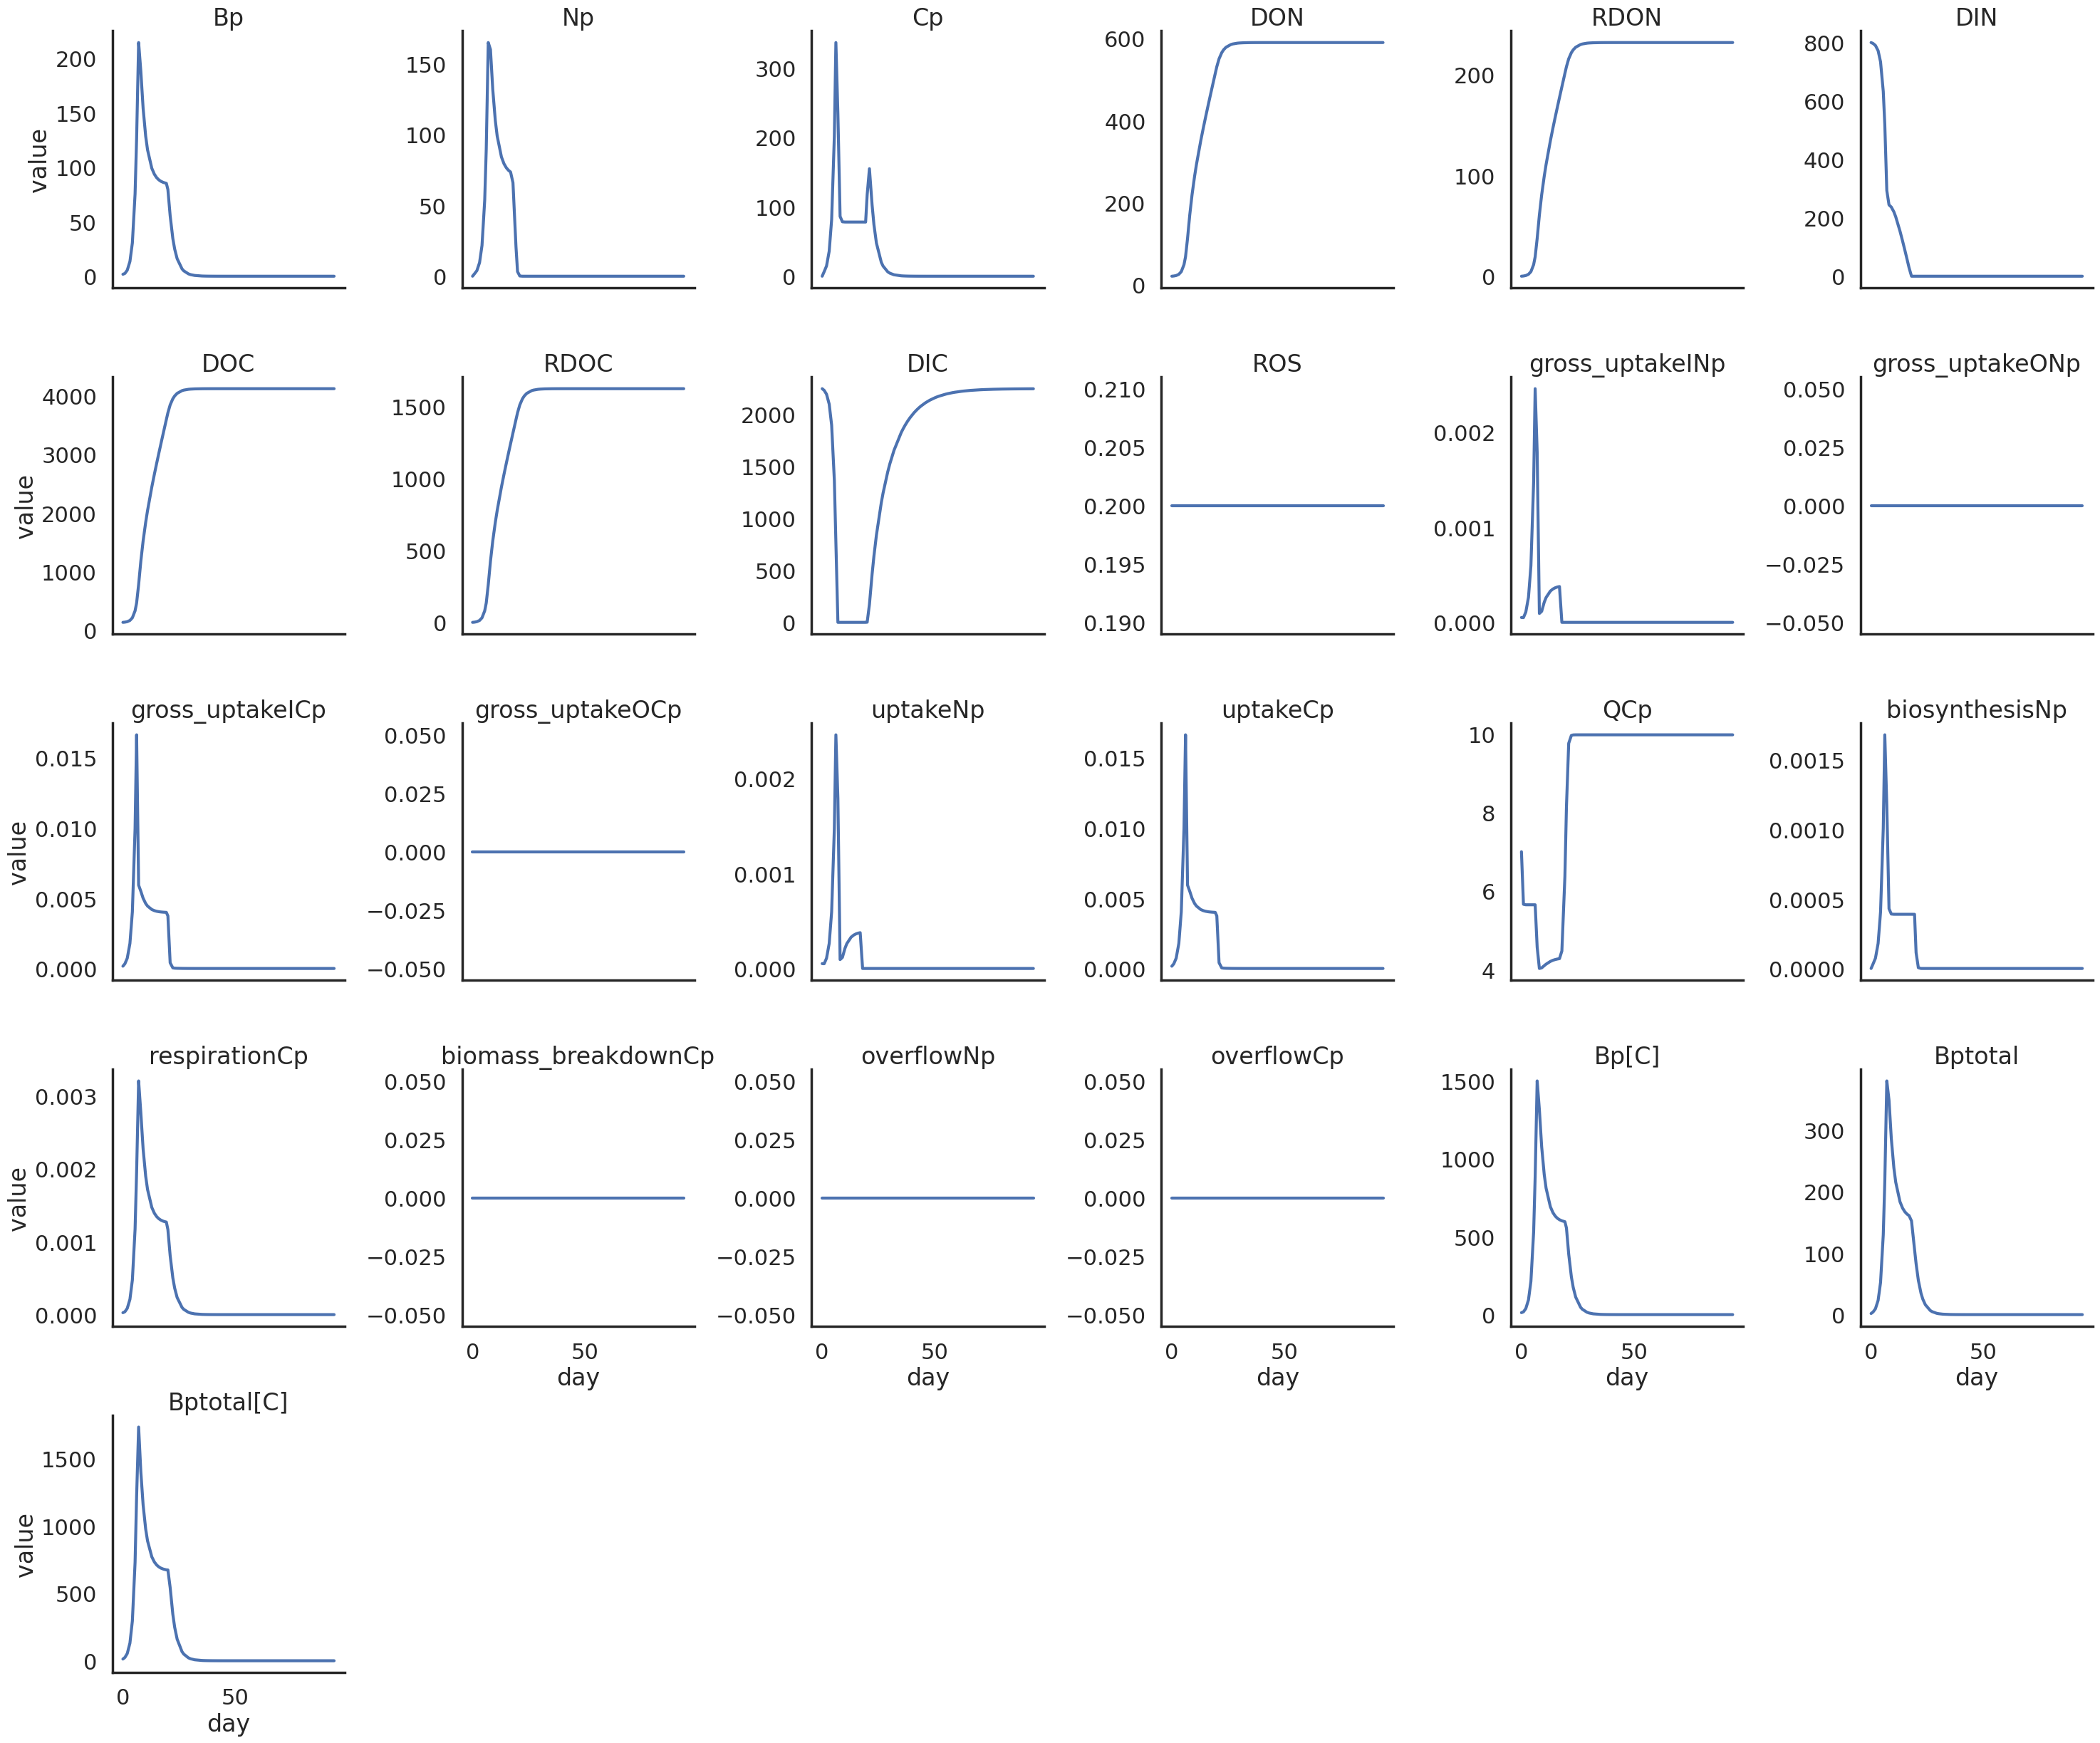

In [50]:
sns.relplot(
    data=vprodf.loc[
        vprodf.vpro.isin(['MIN_27'])& 
        vprodf.media.isin(['pro99'])
    ].melt(id_vars = [ 't', 'day','run_id', 'media', 'mode', 'run','model', 'vpro']),
    x='day', y='value', col='variable', facet_kws=dict(sharey=False),
    kind='line', col_wrap=6,
           ).set_titles(col_template='{col_name}')

In [34]:
vprodf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'media', 'mode', 'run',
       'model', 'vpro'],
      dtype='object')

In [31]:
vpromse_df.loc[
    ~vpromse_df.run_id.isin(negative_run_ids) & 
     vpromse_df.media.isin(['pro99']) &
     (vpromse_df.RMSE < 40), 'RMSE'].describe()

count    318.000000
mean      34.364726
std        3.894838
min       23.580940
25%       31.533755
50%       35.059390
75%       37.727167
max       39.992514
Name: RMSE, dtype: float64

In [29]:
lowerror_ids

array(['ROS_5', 'MIN_12', 'EXOENZYME_15', 'MIXOTROPH_8', 'ROS_18',
       'MIN_27', 'ROS_15', 'MIN_4', 'MIXOTROPH_28', 'EXOENZYME_43',
       'EXOENZYME_50', 'MIN_10', 'MIXOTROPH_4', 'MIN_0', 'OVERFLOW_4',
       'MIXOTROPH_5', 'MIXOTROPH_3', 'EXOENZYME_24', 'MIN_15', 'ROS_40',
       'MIXOTROPH_21', 'EXOENZYME_12', 'MIN_6', 'ROS_29', 'OVERFLOW_9',
       'MIN_34', 'ROS_26', 'OVERFLOW_6', 'EXOENZYME_11', 'EXOENZYME_1',
       'ROS_37', 'EXOENZYME_13', 'OVERFLOW_11', 'ROS_11', 'ROS_33',
       'EXOENZYME_9', 'MIN_23', 'MIXOTROPH_11', 'ROS_38', 'OVERFLOW_8',
       'MIN_32', 'ROS_2', 'ROS_50', 'OVERFLOW_40', 'MIN_17', 'ROS_27',
       'ROS_10', 'OVERFLOW_2', 'MIXOTROPH_19', 'ROS_1', 'ROS_20',
       'MIN_18', 'ROS_14', 'MIN_9', 'ROS_17', 'MIN_41', 'MIN_13',
       'OVERFLOW_12', 'EXOENZYME_2', 'MIN_40', 'EXOENZYME_26', 'MIN_8',
       'EXOENZYME_17', 'MIN_2', 'ROS_16', 'MIN_16', 'ROS_13',
       'MIXOTROPH_16', 'ROS_23', 'MIXOTROPH_1', 'MIN_24', 'EXOENZYME_16',
       'ROS_45', 'EXOENZYM

In [175]:
vpromse_df.loc[~vpromse_df.run_id.isin(negative_run_ids)].groupby(['media', 'model'
                                                                  ])['RMSE'].describe()


count       mean        std        min        25%        50%  \
media model                                                                     
lowN  EXOENZYME  129.0  19.577795   2.429264  14.291056  17.800365  19.845343   
      MIN        111.0  18.996998   1.942471  14.791042  17.684294  19.116121   
      MIXOTROPH  141.0  14.477864   2.806381   9.342429  12.232910  14.143957   
      OVERFLOW   117.0  16.843258   3.794216   9.057984  14.039432  16.581645   
      ROS        117.0  18.351268   2.412508  11.210354  17.240432  18.453114   
pro99 EXOENZYME  147.0  43.114084  12.765765  23.580940  33.541777  42.779922   
      MIN        135.0  39.161681   4.471145  30.945093  36.033593  38.389392   
      MIXOTROPH  144.0  49.964390  16.558499  24.464693  37.520228  51.567224   
      OVERFLOW   117.0  44.937167  12.434688  26.493968  37.071459  43.530075   
      ROS        147.0  39.566841   6.020810  27.856614  34.840153  39.357049   

                       75%         max  
media model                             
lowN  EXOENZYME  21.233585   24.246427  
      MIN        20.381644   23.060351  
      MIXOTROPH  16.830656   20.275459  
      OVERFLOW   18.955036   24.999127  
      ROS        20.249420   23.080328  
pro99 EXOENZYME  50.290946  100.895982  
      MIN        41.789527   50.505868  
      MIXOTROPH  59.655006  124.398177  
      OVERFLOW   51.907986   99.099190  
      ROS        43.452358   59.586144

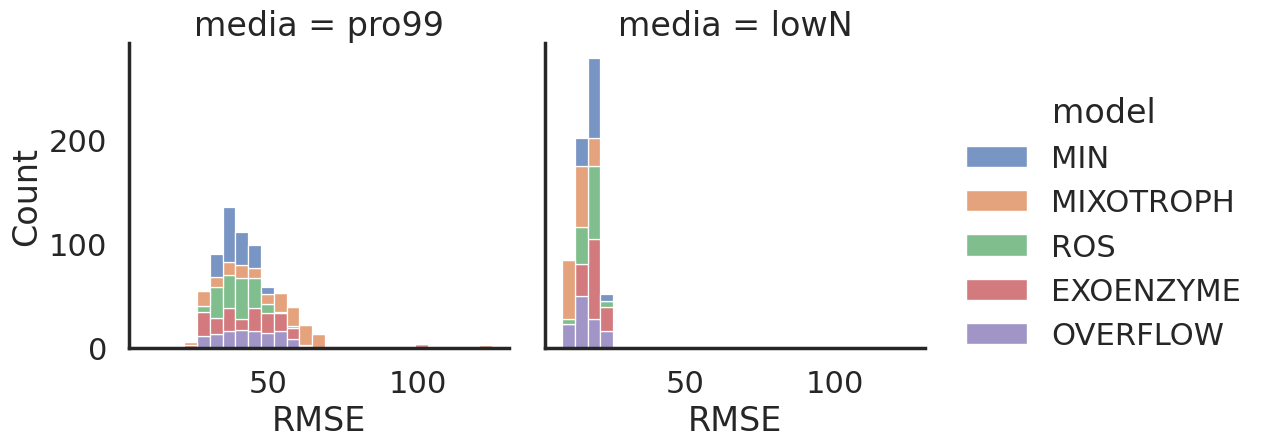

In [163]:
g = sns.displot(
    data=vpromse_df.loc[~vpromse_df.run_id.isin(negative_run_ids)], x='RMSE', 
    hue='model', col='media', lw=1, #fill=None,
    multiple='stack',
)


In [164]:
mse_df[['media', 'run']].value_counts()

media  run        
lowN   sensitivity    2508
pro99  sensitivity      30
dtype: int64

# baseline and vpro dfs

In [26]:
basedf.run_id.unique()

array(['baseline_ponly_FULL', 'baseline_ponly_LEAK',
       'baseline_ponly_MIXO', 'baseline_ponly_MIN'], dtype=object)

In [27]:
vprodf[['idx', 'model', 'f_scale']] = vprodf.run_id.str.split('_', expand=True)[[0,4,5]]
vpromse_df[['idx', 'model', 'f_scale']] = vpromse_df.run_id.str.split('_', expand=True)[[0,4,5]]
vprosum_df[['idx', 'model', 'f_scale']] = vprosum_df.run_id.str.split('_', expand=True)[[0,4,5]]


In [28]:
vpromse_df.idx.unique()

array(['vpro'], dtype=object)

In [29]:
basedf[['idx', 'model']] = basedf.run_id.str.split('_', expand=True)[[0,2]]
basemse_df[['idx',  'model']] = basemse_df.run_id.str.split('_', expand=True)[[0,2]]
basesum_df[['idx',  'model']] = basesum_df.run_id.str.split('_', expand=True)[[0,2]]


In [30]:
basemse_df.idx.unique()

array(['baseline'], dtype=object)

In [31]:
basedf = pd.concat([basedf, vprodf], ignore_index=True)
basemse_df = pd.concat([basemse_df, vpromse_df], ignore_index=True)
basesum_df = pd.concat([basesum_df, vprosum_df], ignore_index=True)


In [32]:
basemse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [33]:
basemse_df.run_id.value_counts()

baseline_ponly_FULL                  3
vpro_ponly_least_square_MIXO_1       3
vpro_ponly_least_square_LEAK_0.1     3
vpro_ponly_least_square_LEAK_0.01    3
vpro_ponly_least_square_MIN_0.01     3
vpro_ponly_least_square_MIXO_0.1     3
vpro_ponly_least_square_MIN_10       3
vpro_ponly_least_square_MIXO_10      3
vpro_ponly_least_square_LEAK_20      3
vpro_ponly_least_square_MIN_20       3
vpro_ponly_least_square_MIXO_20      3
baseline_ponly_MIXO                  3
vpro_ponly_least_square_LEAK_10      3
vpro_ponly_least_square_MIXO_100     3
vpro_ponly_least_square_MIN_1        3
vpro_ponly_least_square_MIN_0.1      3
vpro_ponly_least_square_LEAK_100     3
vpro_ponly_least_square_MIN_100      3
baseline_ponly_LEAK                  3
baseline_ponly_MIN                   3
vpro_ponly_least_square_LEAK_1       3
Name: run_id, dtype: int64

In [34]:
basemse_df.head()

Sample full name   Group  compare_points         MSE               run_id  \
0    1A0    Axenic  Axenic            74.0  795.229319  baseline_ponly_FULL   
1    1B0    Axenic  Axenic            74.0  836.147406  baseline_ponly_FULL   
2    1C0    Axenic  Axenic            74.0  877.345874  baseline_ponly_FULL   
3    1A0    Axenic  Axenic            74.0  796.898222  baseline_ponly_MIXO   
4    1B0    Axenic  Axenic            74.0  836.919813  baseline_ponly_MIXO   

        idx model f_scale  
0  baseline  FULL     NaN  
1  baseline  FULL     NaN  
2  baseline  FULL     NaN  
3  baseline  MIXO     NaN  
4  baseline  MIXO     NaN

In [35]:
basesum_df.head()

Mh        Mp   gammaDp  gammaDh   Rp   Rh           EOp  EIp  \
0  0.000001  0.000001  0.600000      0.6  7.0  4.5  0.000000e+00  0.0   
1  0.000001  0.000001  0.600000      0.6  7.0  4.5  1.157407e-06  0.0   
2  0.000001  0.000001  0.600000      0.6  7.0  4.5  1.157407e-06  0.0   
3  0.000001  0.000001  0.600000      0.6  7.0  4.5  1.157407e-06  0.0   
4  0.000001  0.000003  0.198338      0.6  7.0  4.5  4.007643e-07  0.0   

        EOh  EIh  ...          MABp          MABh       r0p       r0h    bp  \
0  0.000000  0.0  ...  0.000000e+00  0.000000e+00  0.000002  0.000002  0.01   
1  0.000001  0.0  ...  0.000000e+00  0.000000e+00  0.000002  0.000002  0.01   
2  0.000001  0.0  ...  1.157407e-07  1.157407e-07  0.000002  0.000002  0.01   
3  0.000001  0.0  ...  0.000000e+00  0.000000e+00  0.000002  0.000002  0.01   
4  0.000001  0.0  ...  0.000000e+00  0.000000e+00  0.000002  0.000002  0.01   

     bh                            run_id       idx  model  f_scale  
0  0.01                baseline_ponly_MIN  baseline    MIN      NaN  
1  0.01               baseline_ponly_MIXO  baseline   MIXO      NaN  
2  0.01               baseline_ponly_FULL  baseline   FULL      NaN  
3  0.01               baseline_ponly_LEAK  baseline   LEAK      NaN  
4  0.01  vpro_ponly_least_square_MIXO_0.1      vpro   MIXO      0.1  

[5 rows x 51 columns]

In [36]:
basedf.head()

Bp         DON      RDON         DIN         DOC      RDOC  \
0   1.785714   20.000000  0.000000  100.000000  132.500000  0.000000   
1   3.257973   36.610271  0.105979   81.811491  132.548429  0.741854   
2   5.934351   66.827346  0.299304   48.724713  132.647703  2.095129   
3   8.183333   92.203476  0.462430   20.936475  132.742434  3.237008   
4  14.207659  106.671611  0.902467    0.003978  133.047851  6.317266   

           DIC       ROS           ABp  ABh         t       day      Bp[C]  \
0  2241.552301  0.200000  0.000000e+00  0.0       0.0  0.000000  12.500000   
1  2231.004986  0.345498  1.476506e-11  0.0   93480.0  1.081944  22.805810   
2  2212.952593  0.611118  4.154007e-11  0.0  187020.0  2.164583  41.540454   
3  2198.156240  0.835315  6.407347e-11  0.0  237360.0  2.747222  57.283332   
4  2159.084417  1.440189  1.247558e-10  0.0  324360.0  3.754167  99.453612   

         ABp[C]  ABh[C]               run_id       idx model f_scale  
0  0.000000e+00     0.0  baseline_ponly_FULL  baseline  FULL     NaN  
1  1.033554e-10     0.0  baseline_ponly_FULL  baseline  FULL     NaN  
2  2.907805e-10     0.0  baseline_ponly_FULL  baseline  FULL     NaN  
3  4.485143e-10     0.0  baseline_ponly_FULL  baseline  FULL     NaN  
4  8.732904e-10     0.0  baseline_ponly_FULL  baseline  FULL     NaN

In [37]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'sen_param_model', 'idx', 'model', 'sen_param', 'sen_param_value'],
      dtype='object')

In [60]:
mse_df = pd.concat([mse_df, vpromse_df])
df = pd.concat([df, vprodf])
sum_df = pd.concat([sum_df, vprosum_df])

In [38]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
baseparam_values_df = basesum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [39]:
basemse_df = pd.merge(basemse_df, baseparam_values_df, on=['run_id'], how='left')

In [40]:
basemse_df.idx.value_counts()

vpro        2397
baseline     564
Name: idx, dtype: int64

In [41]:
basemse_df = basemse_df.loc[
    (basemse_df.model.isin(['MIN']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIN']),'sen_param'])) |
    (basemse_df.model.isin(['LEAK']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['LEAK']),'sen_param'])) |
    (basemse_df.model.isin(['MIXO']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIXO']),'sen_param'])) |
    (basemse_df.model.isin(['FULL']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['FULL']),'sen_param'])) 
]

In [42]:
basemse_df.idx.value_counts()

vpro        399
baseline    126
Name: idx, dtype: int64

In [43]:
mse_df = pd.concat([mse_df, basemse_df],ignore_index=True )

In [44]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['MIXO', 'FULL', 'LEAK', 'MIN'], dtype=object),
 array(['KINp', 'KONp', 'VmaxINp', 'gammaDp', 'omegaP', 'decayABp', 'KABp',
        'MABp', 'EOp', 'VmaxOCp', 'VmaxONp', 'E_ROSp', 'KOCp', 'KICp',
        'VmaxICp', 'Mp', 'EABp', 'ROS_decay'], dtype=object),
 array(['0', '9', '4', '16', '11', '17', '7', '13', '19', '12', '2', '14',
        '15', '5', '3', '1', '8', '6', '18', '10'], dtype=object))

In [45]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['KOCp', 'KICp', 'VmaxONp', 'KABp', 'omegaP', 'EABp', 'VmaxINp',
        'gammaDp', 'Mp', 'KINp', 'KONp', 'VmaxICp', 'EOp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['1', '14', '6', '7', '2', '17', '5', '18', '12', '15', '19', '8',
        '0', '4', '9', '3', '16', '11', '10', '13', 'baseline', 'vpro'],
       dtype=object))

In [46]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'MIXO', 'FULL', 'MIN'], dtype=object),
 array(['Mp', 'VmaxOCp', 'KOCp', 'KONp', 'VmaxONp', 'VmaxINp', 'gammaDp',
        'omegaP', 'VmaxICp', 'KICp', 'EOp', 'E_ROSp', 'KINp', 'decayABp',
        'MABp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['13', '12', '5', '11', '17', '0', '10', '3', '4', '16', '2', '8',
        '7', '6', '14', '19', '9', '1', '18', '15'], dtype=object))

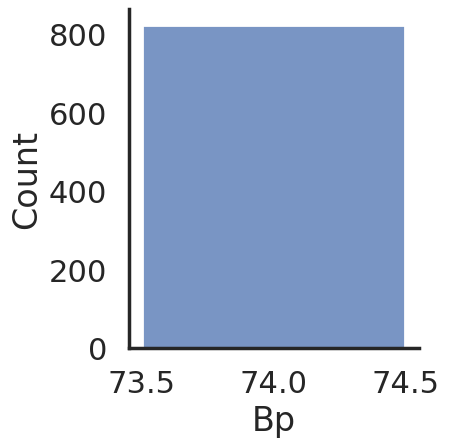

In [47]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [48]:
mse_df.nsmallest(columns='MSE', n=20)

Sample full name   Group  compare_points        MSE  \
933     1A0    Axenic  Axenic            74.0  48.901611   
2337    1A0    Axenic  Axenic            74.0  50.373336   
141     1A0    Axenic  Axenic            74.0  54.668648   
1755    1A0    Axenic  Axenic            74.0  54.669046   
261     1A0    Axenic  Axenic            74.0  54.669517   
1359    1A0    Axenic  Axenic            74.0  54.670076   
1599    1A0    Axenic  Axenic            74.0  54.670738   
612     1A0    Axenic  Axenic            74.0  54.671522   
2169    1A0    Axenic  Axenic            74.0  54.672070   
1632    1A0    Axenic  Axenic            74.0  54.672451   
402     1A0    Axenic  Axenic            74.0  54.672734   
810     1A0    Axenic  Axenic            74.0  54.673174   
615     1A0    Axenic  Axenic            74.0  54.673552   
1611    1A0    Axenic  Axenic            74.0  54.673617   
2124    1A0    Axenic  Axenic            74.0  54.674070   
1701    1A0    Axenic  Axenic            74.0  54.674362   
780     1A0    Axenic  Axenic            74.0  54.674802   
429     1A0    Axenic  Axenic            74.0  54.674856   
2421    1A0    Axenic  Axenic            74.0  54.674993   
2460    1A0    Axenic  Axenic            74.0  54.675403   

                                                 run_id sen_param_model idx  \
933   param_sensitivity_ponly_MIN_Mp_10_h-6350224087...          MIN_Mp  10   
2337  param_sensitivity_ponly_MIN_Mp_11_h-4005430513...          MIN_Mp  11   
141   param_sensitivity_ponly_MIN_KICp_0_h-276366306...        MIN_KICp   0   
1755  param_sensitivity_ponly_MIN_KICp_1_h5817399541...        MIN_KICp   1   
261   param_sensitivity_ponly_MIN_KICp_2_h-587032821...        MIN_KICp   2   
1359  param_sensitivity_ponly_MIN_KICp_3_h-642780311...        MIN_KICp   3   
1599  param_sensitivity_ponly_MIN_KICp_4_h4268934620...        MIN_KICp   4   
612   param_sensitivity_ponly_MIN_KICp_5_h2091062636...        MIN_KICp   5   
2169  param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...     MIN_VmaxINp   0   
1632  param_sensitivity_ponly_MIN_KICp_6_h-181862465...        MIN_KICp   6   
402   param_sensitivity_ponly_MIN_KINp_19_h686031565...        MIN_KINp  19   
810   param_sensitivity_ponly_MIN_VmaxINp_1_h-212521...     MIN_VmaxINp   1   
615   param_sensitivity_ponly_MIN_KICp_7_h5319297595...        MIN_KICp   7   
1611  param_sensitivity_ponly_MIN_KINp_18_h835580927...        MIN_KINp  18   
2124  param_sensitivity_ponly_MIN_VmaxINp_2_h2331563...     MIN_VmaxINp   2   
1701  param_sensitivity_ponly_MIN_KINp_17_h-31277478...        MIN_KINp  17   
780   param_sensitivity_ponly_MIN_VmaxINp_3_h-192257...     MIN_VmaxINp   3   
429   param_sensitivity_ponly_MIN_KICp_8_h8490986744...        MIN_KICp   8   
2421  param_sensitivity_ponly_MIN_KINp_16_h321746262...        MIN_KINp  16   
2460  param_sensitivity_ponly_MIN_VmaxINp_4_h-673430...     MIN_VmaxINp   4   

     model sen_param  sen_param_value f_scale  
933    MIN        Mp         0.000001     NaN  
2337   MIN        Mp         0.000001     NaN  
141    MIN      KICp         0.028550     NaN  
1755   MIN      KICp         0.033821     NaN  
261    MIN      KICp         0.040065     NaN  
1359   MIN      KICp         0.047461     NaN  
1599   MIN      KICp         0.056223     NaN  
612    MIN      KICp         0.066602     NaN  
2169   MIN   VmaxINp         0.000016     NaN  
1632   MIN      KICp         0.078898     NaN  
402    MIN      KINp         0.713754     NaN  
810    MIN   VmaxINp         0.000019     NaN  
615    MIN      KICp         0.093463     NaN  
1611   MIN      KINp         0.602522     NaN  
2124   MIN   VmaxINp         0.000023     NaN  
1701   MIN      KINp         0.508624     NaN  
780    MIN   VmaxINp         0.000027     NaN  
429    MIN      KICp         0.110717     NaN  
2421   MIN      KINp         0.429360     NaN  
2460   MIN   VmaxINp         0.000032     NaN

In [49]:
mse_df['mode'] = 'sensitivity'
mse_df.loc[mse_df.idx.isin(['baseline']), 'mode'] = 'baseline'
mse_df.loc[mse_df.idx.isin(['vpro']), 'mode'] = 'vpro'


In [50]:
basedf['mode'] = 'sensitivity'
basedf.loc[basedf.idx.isin(['baseline']), 'mode'] = 'baseline'
basedf.loc[basedf.idx.isin(['vpro']), 'mode'] = 'vpro'


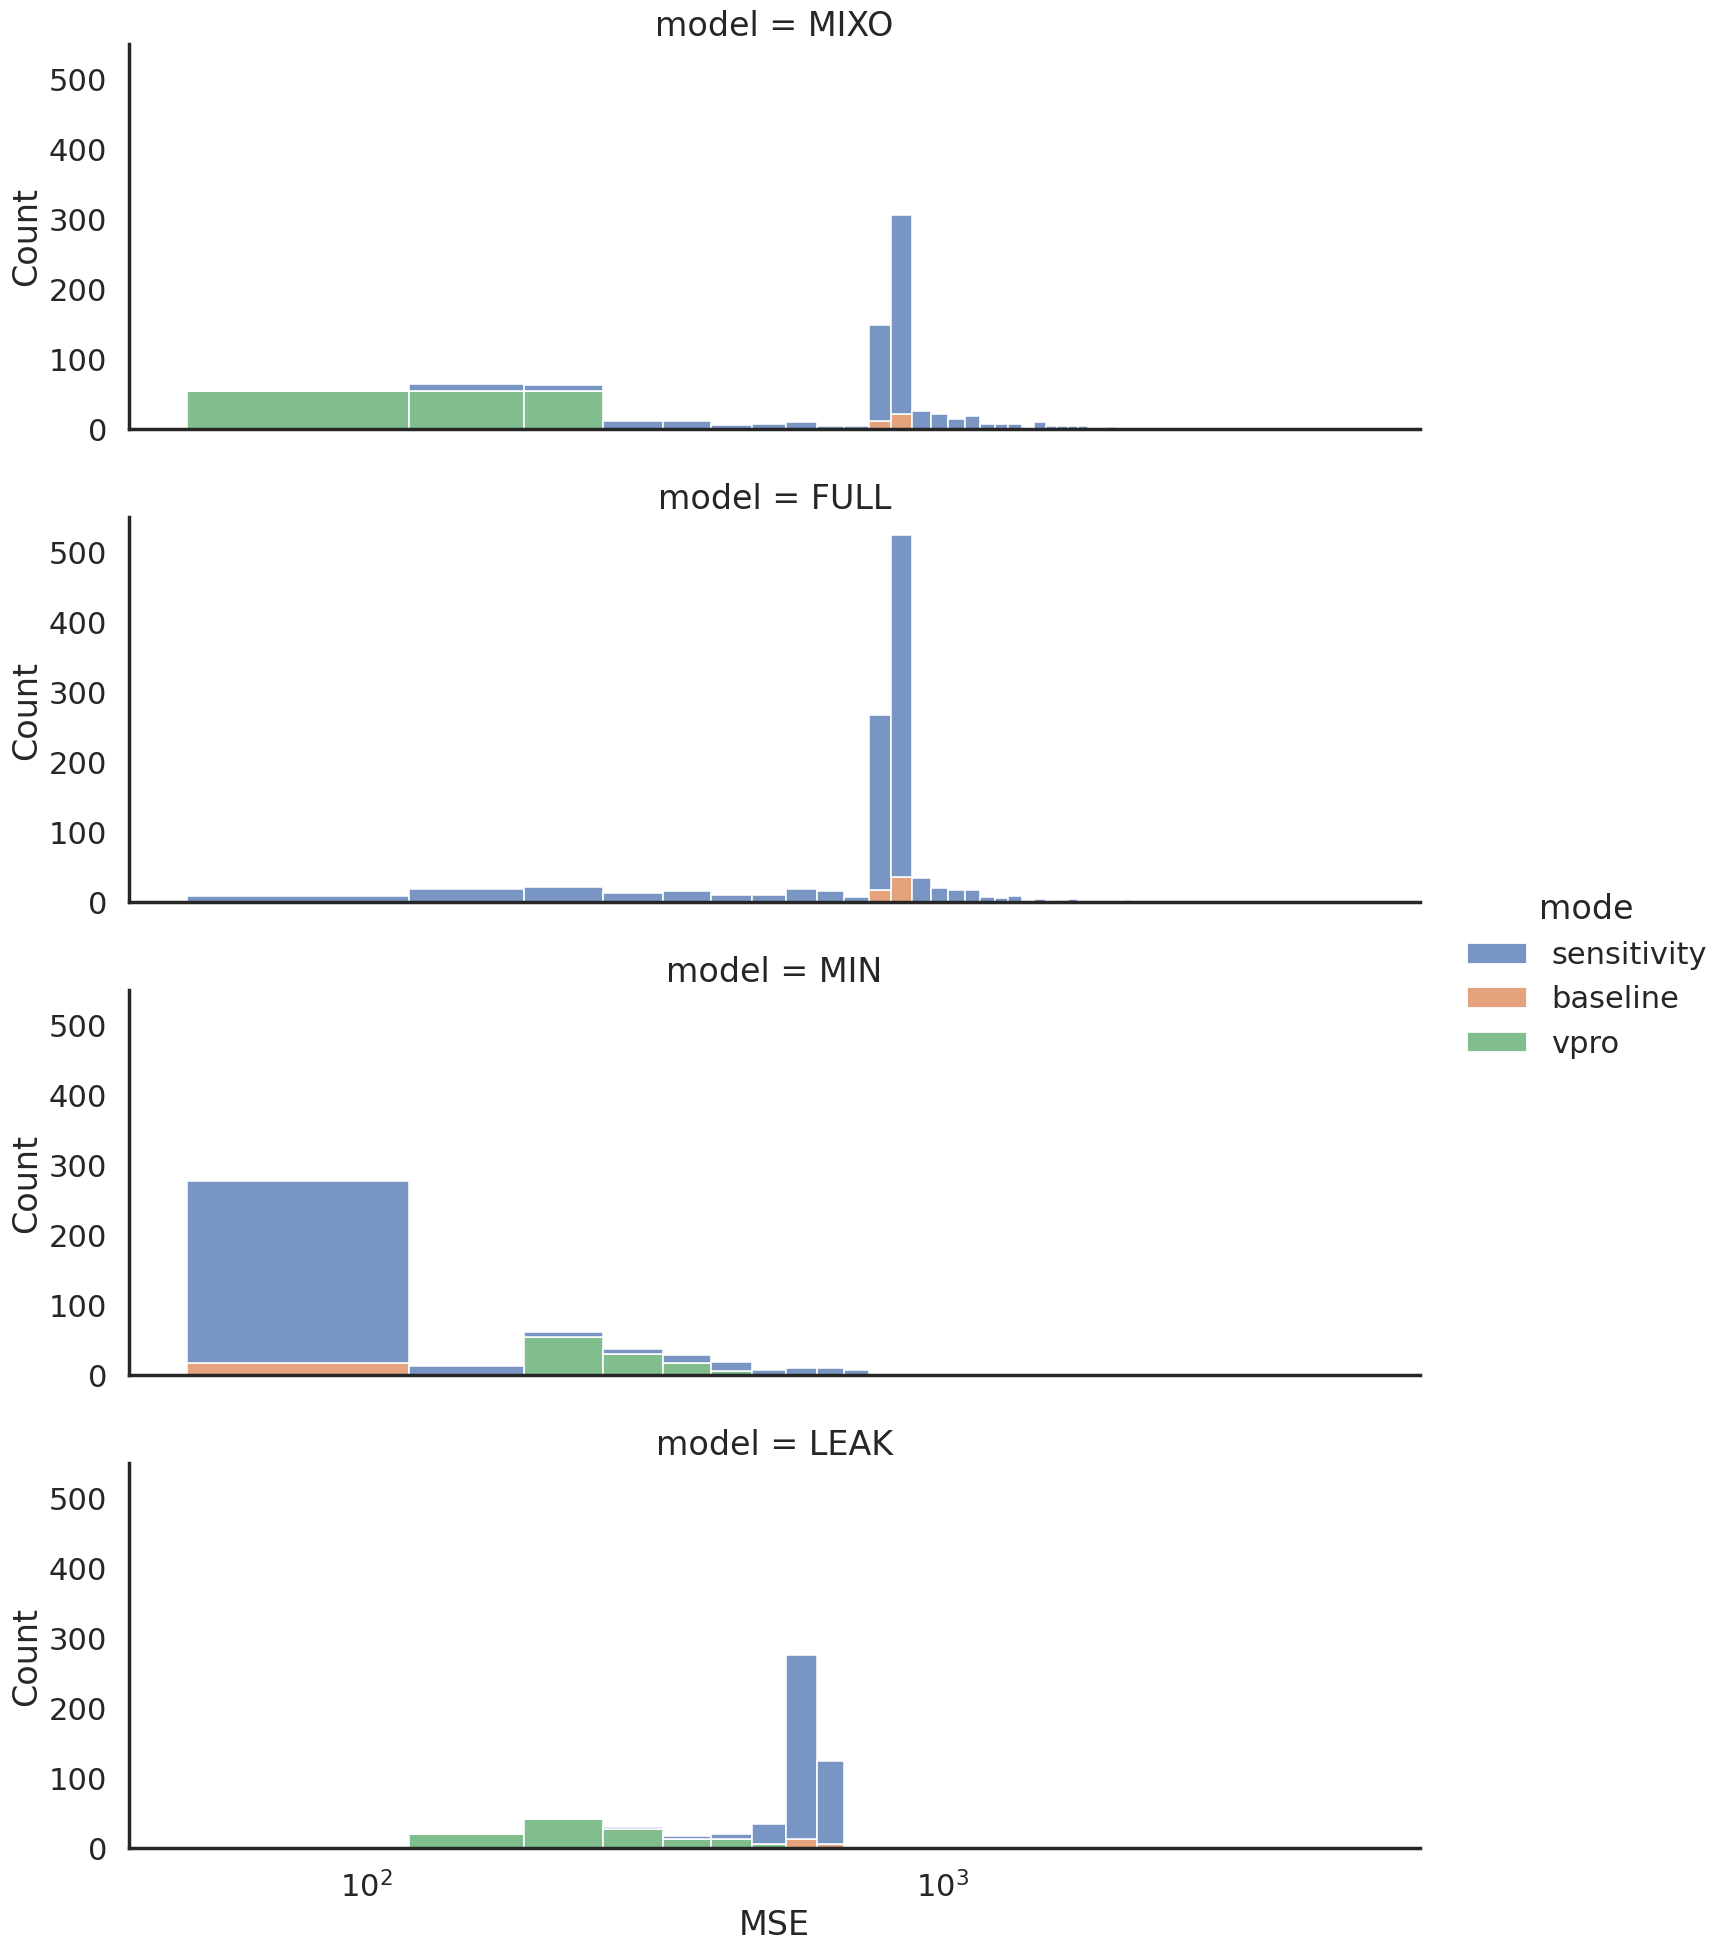

In [51]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='mode',multiple='stack' )
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [52]:
df.min()

Bp                                                               0.0
DON                                                         0.003298
RDON                                                             0.0
DIN                                                         0.000736
DOC                                                         0.036257
RDOC                                                             0.0
DIC                                                         0.019431
ROS                                                         0.055182
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                            0.0
ABp[C]                                                           0.0
ABh[C]                            

In [53]:
basedf.min()

/tmp/ipykernel_867811/2505142616.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  basedf.min()


Bp                        0.0
DON                  0.002532
RDON                      0.0
DIN                  0.000148
DOC                     132.5
RDOC                      0.0
DIC                  0.101415
ROS                  0.055182
ABp                       0.0
ABh                       0.0
t                         0.0
day                       0.0
Bp[C]                     0.0
ABp[C]                    0.0
ABh[C]                    0.0
run_id    baseline_ponly_FULL
idx                  baseline
model                    FULL
mode                 baseline
dtype: object

In [54]:
mse_df.idx.value_counts()

vpro        399
baseline    126
19          126
0           123
13          123
10          123
11          123
16          123
3           123
9           123
4           123
1           123
14          123
15          123
12          123
18          123
5           123
17          123
2           123
7           123
6           123
8           123
Name: idx, dtype: int64

In [55]:
sns.color_palette('Dark2')

In [56]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

#all_df = pd.concat([df, basedf, vprodf], ignore_index=True)
min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']

In [57]:
mse_df.loc[mse_df.model.isin([model_name])].sen_param.unique()


array(['VmaxINp', 'gammaDp', 'Mp', 'KINp', 'VmaxICp', 'KICp'],
      dtype=object)

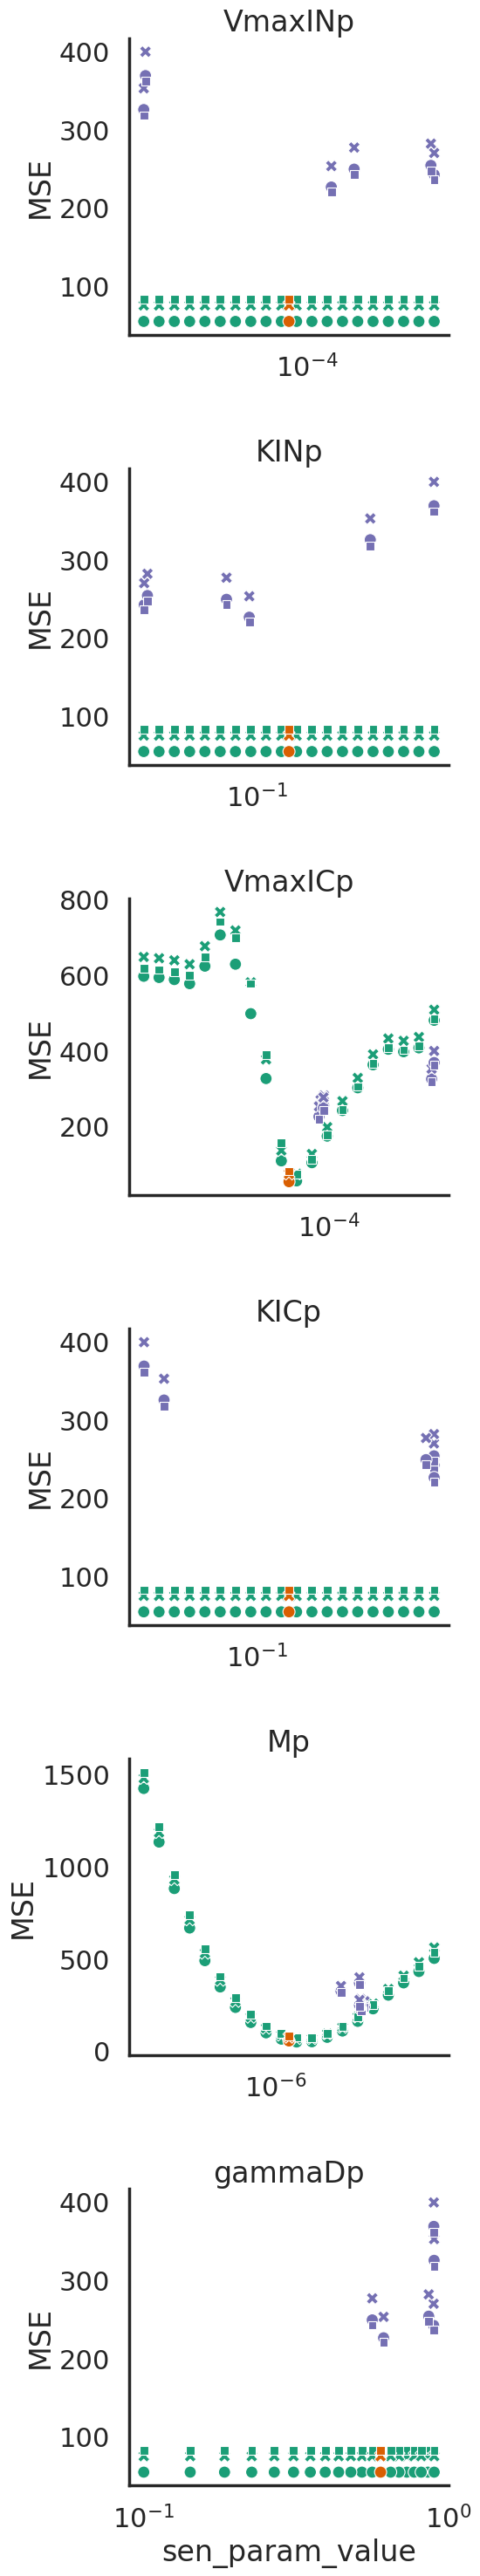

In [58]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin([model_name])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    row_order = min_porder,
    style='Sample', 
    hue ='mode', legend=False,
    palette=mpalette, hue_order=morder,
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

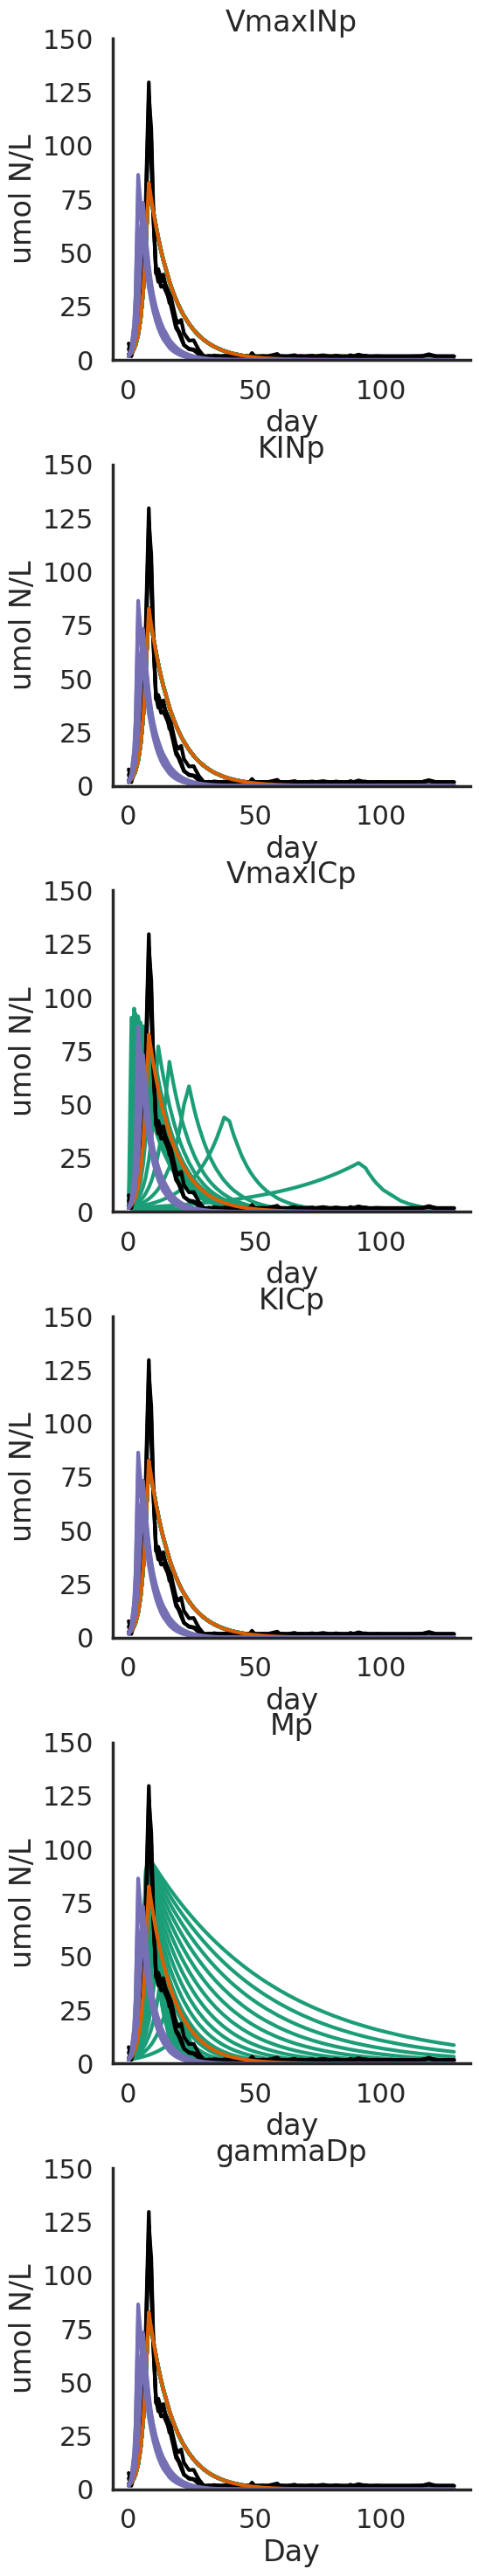

In [59]:
for m in ['MIN']:
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[sensitivity_color], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_order = min_porder,
        col_wrap=1,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
        
    ).set(ylim=(0,150))

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )
        sns.lineplot(
            data=basedf.loc[basedf.model.isin([m])],
            x='day', y='Bp',
            estimator=None, units='run_id',
            hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
            ax=ax,
        )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

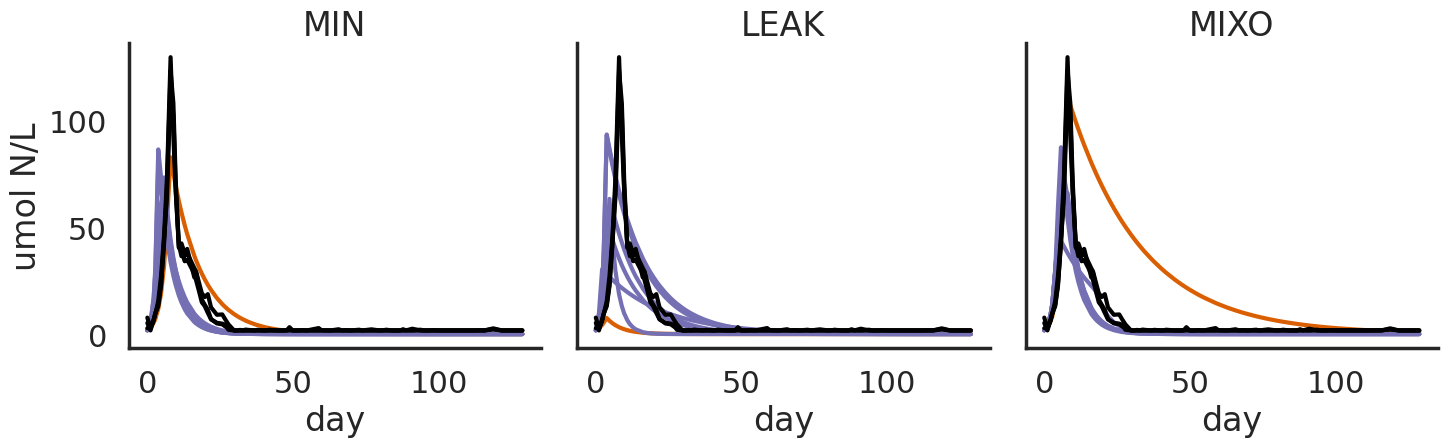

In [60]:
#base_df['model_'] = base_df['model_']

g = sns.relplot(
    data=basedf,# .loc[basedf.model.isin([m])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L')


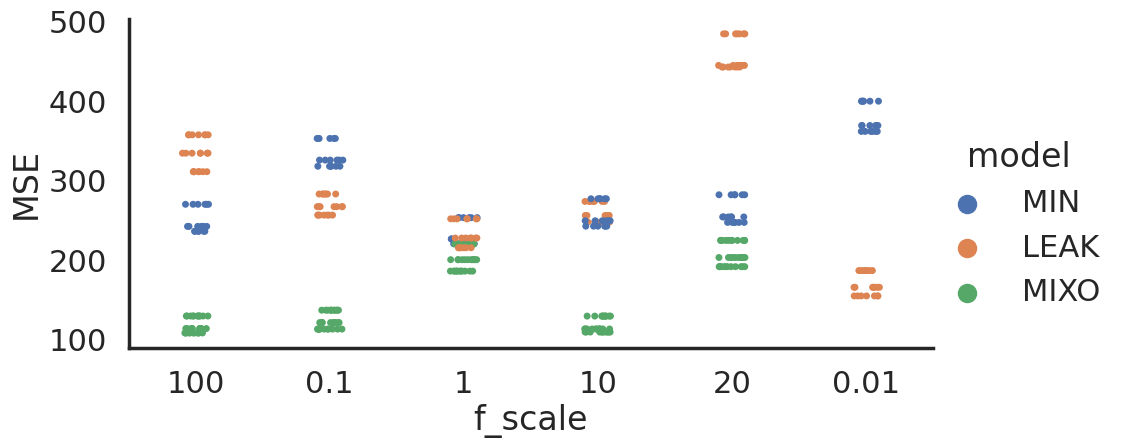

In [61]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model',
)

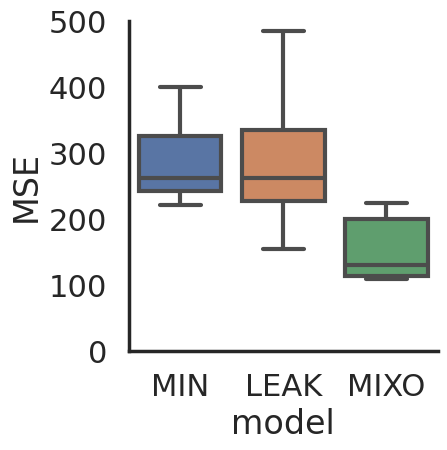

In [74]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='model', y='MSE', aspect=1, hue='model',kind='box', dodge=False,
).set(ylim=(0,500))

In [62]:
refdf.dtypes

day             float64
Sample           object
id                int64
replicate        object
transfer          int64
transfer day      int64
heterotroph      object
full name        object
FL              float64
Group            object
predicted       float64
ref_Bp          float64
LOD                bool
t               float64
dtype: object

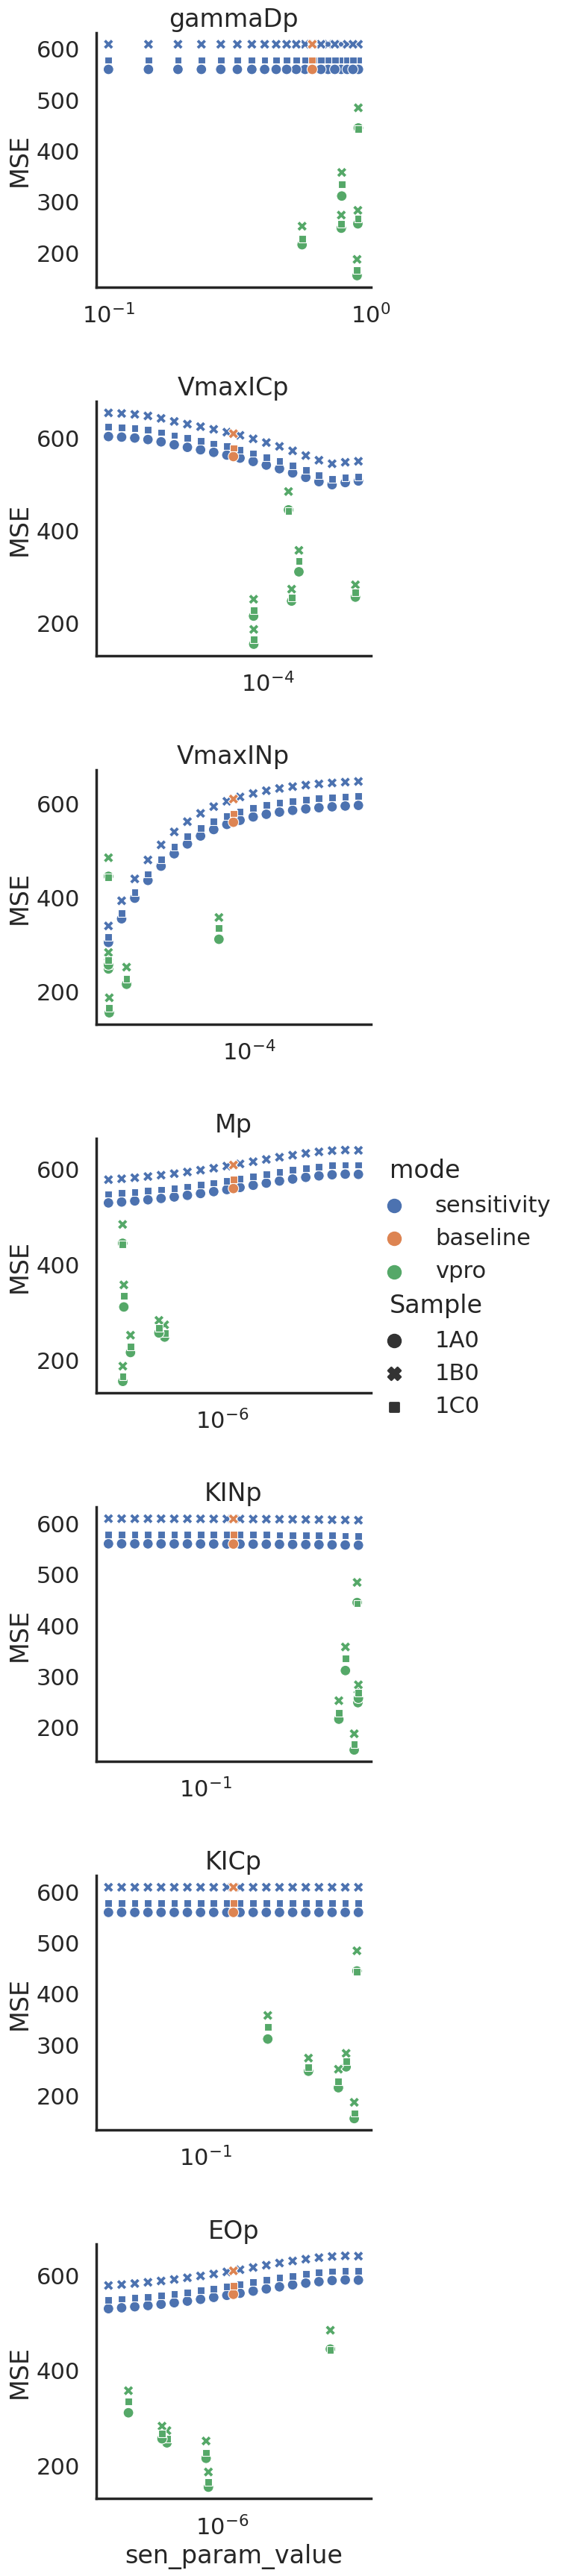

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

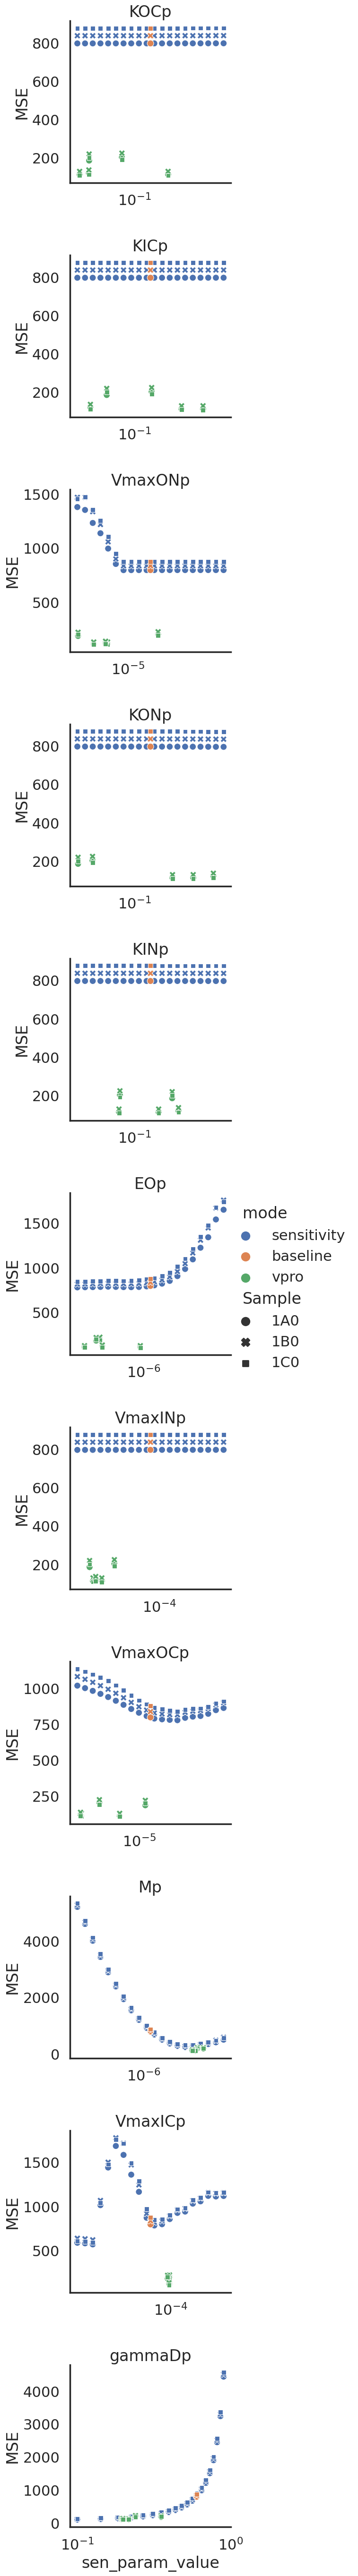

In [64]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [65]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      27
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [66]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

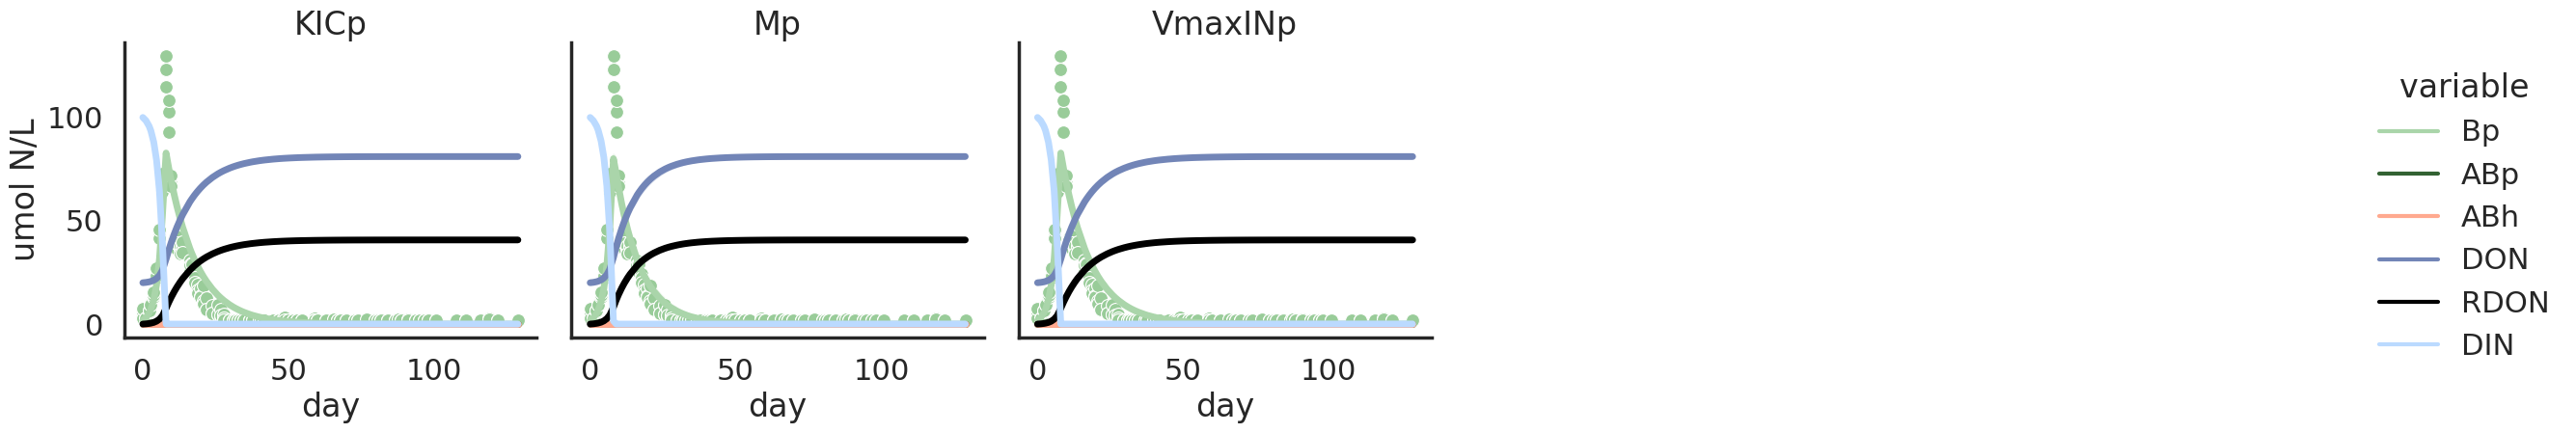

In [67]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [68]:
plt.show()

In [69]:
lowest_ids

933     param_sensitivity_ponly_MIN_Mp_10_h-6350224087...
2337    param_sensitivity_ponly_MIN_Mp_11_h-4005430513...
141     param_sensitivity_ponly_MIN_KICp_0_h-276366306...
1755    param_sensitivity_ponly_MIN_KICp_1_h5817399541...
261     param_sensitivity_ponly_MIN_KICp_2_h-587032821...
1359    param_sensitivity_ponly_MIN_KICp_3_h-642780311...
1599    param_sensitivity_ponly_MIN_KICp_4_h4268934620...
612     param_sensitivity_ponly_MIN_KICp_5_h2091062636...
2169    param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...
1632    param_sensitivity_ponly_MIN_KICp_6_h-181862465...
Name: run_id, dtype: object